In [1]:
import torch

from utils.visualize import visualize
import os
import pandas as pd
from utils.reranker import Reranker
import logging

# 获取 vllm 日志记录器
vllm_logger = logging.getLogger("vllm")

# 设置日志等级，例如设置为 WARNING
vllm_logger.setLevel(logging.WARNING)

# os.environ["CUDA_VISIBLE_DEVICES"] = "6,7"

model_path = "model/Qwen/Qwen2-VL-2B-Instruct-AWQ"
# model_path = "/home/hutu/workspace/qwen_server/model/qwen2-vl-7B-Instruct-AWQ"

print(torch.cuda.device_count())

/home/hutu/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-10 17:08:41,916	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


2


In [2]:
reranker = Reranker(
    model_path, quantization="awq", tensor_parallel_size=2, max_model_len=10000
)

WARNING 01-10 17:08:53 config.py:428] awq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 01-10 17:08:53 config.py:503] To see benefits of async output processing, enable CUDA graph. Since, enforce-eager is enabled, async output processor cannot be used
WARNING 01-10 17:08:53 multiproc_gpu_executor.py:56] Reducing Torch parallelism from 44 threads to 1 to avoid unnecessary CPU contention. Set OMP_NUM_THREADS in the external environment to tune this value as needed.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


WARNING 01-10 17:09:00 custom_all_reduce.py:143] Custom allreduce is disabled because your platform lacks GPU P2P capability or P2P test failed. To silence this warning, specify disable_custom_all_reduce=True explicitly.
(VllmWorkerProcess pid=1365078) WARNING 01-10 17:09:00 custom_all_reduce.py:143] Custom allreduce is disabled because your platform lacks GPU P2P capability or P2P test failed. To silence this warning, specify disable_custom_all_reduce=True explicitly.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.42it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.42it/s]



## Oversea Dataset

In [3]:
# # read parquet file
# df = pd.read_parquet("data/all_hw_images_cleaned.parquet")
# df.head(1)

## Shopee Dataset

In [4]:
df = pd.read_json("data/shopee/marqo.json", lines=True)

# generate labels
label2posting_id = df.groupby("label_group").posting_id.agg("unique").to_dict()
df["label"] = df.label_group.map(label2posting_id)

df["image_path"] = df["image"].apply(
    lambda x: os.path.join("data/shopee/train_images", x)
)
df.head(1)

posting_id                                 image       image_phash  \
0  train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   

                       title  label_group  \
0  Paper Bag Victoria Secret    249114794   

                                                pred  \
0  [train_129225211, train_2278313361, train_1147...   

                                 label  \
0  [train_129225211, train_2278313361]   

                                          image_path  
0  data/shopee/train_images/0000a68812bc7e98c4288...

Processed prompts: 100%|██████████| 15/15 [00:15<00:00,  1.03s/it, est. speed input: 2153.08 toks/s, output: 0.97 toks/s]


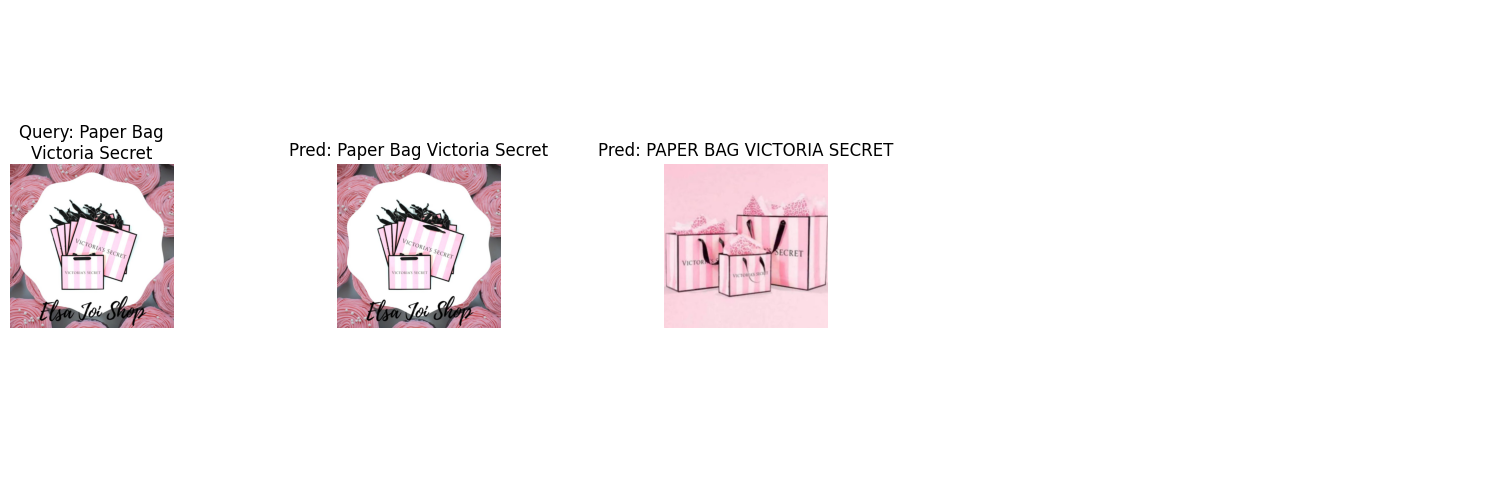

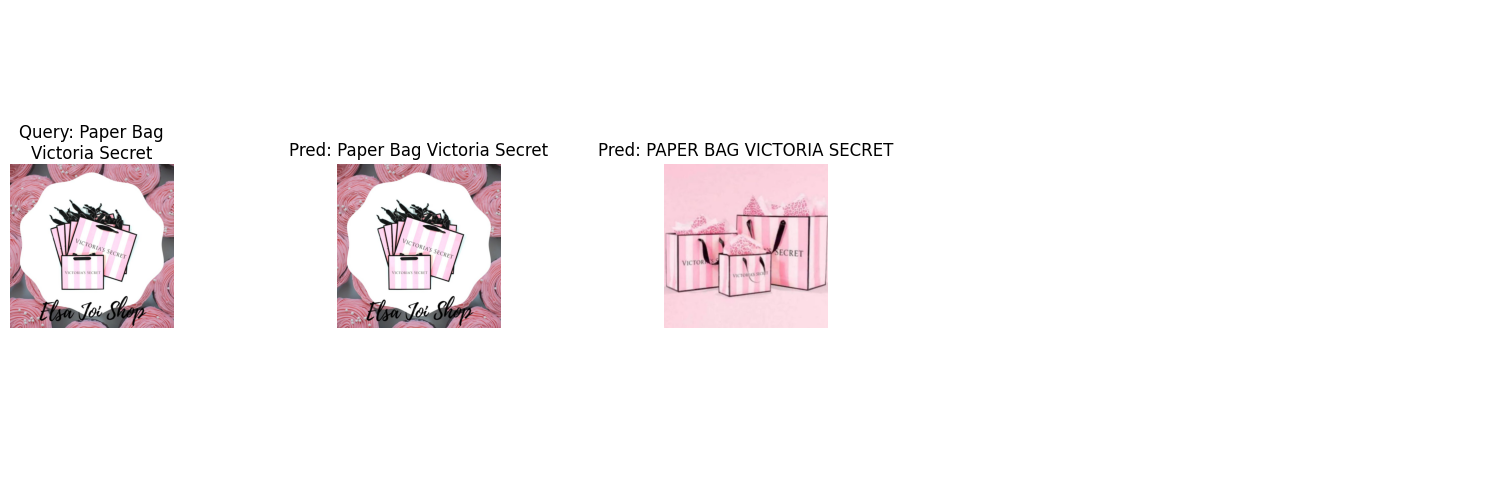

Processed prompts: 100%|██████████| 15/15 [00:14<00:00,  1.05it/s, est. speed input: 2312.41 toks/s, output: 1.05 toks/s]


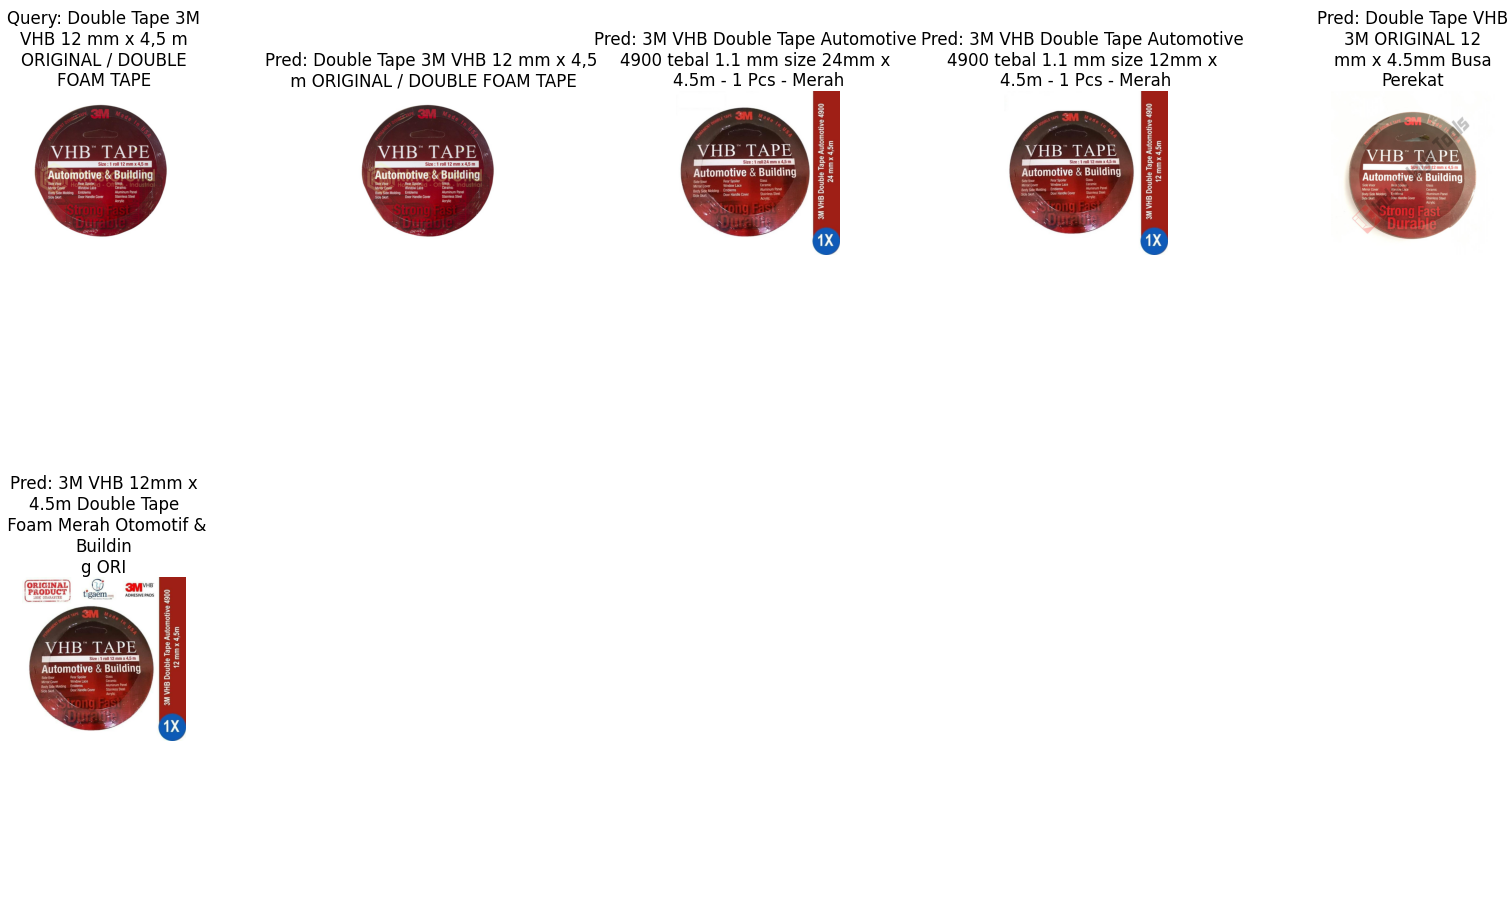

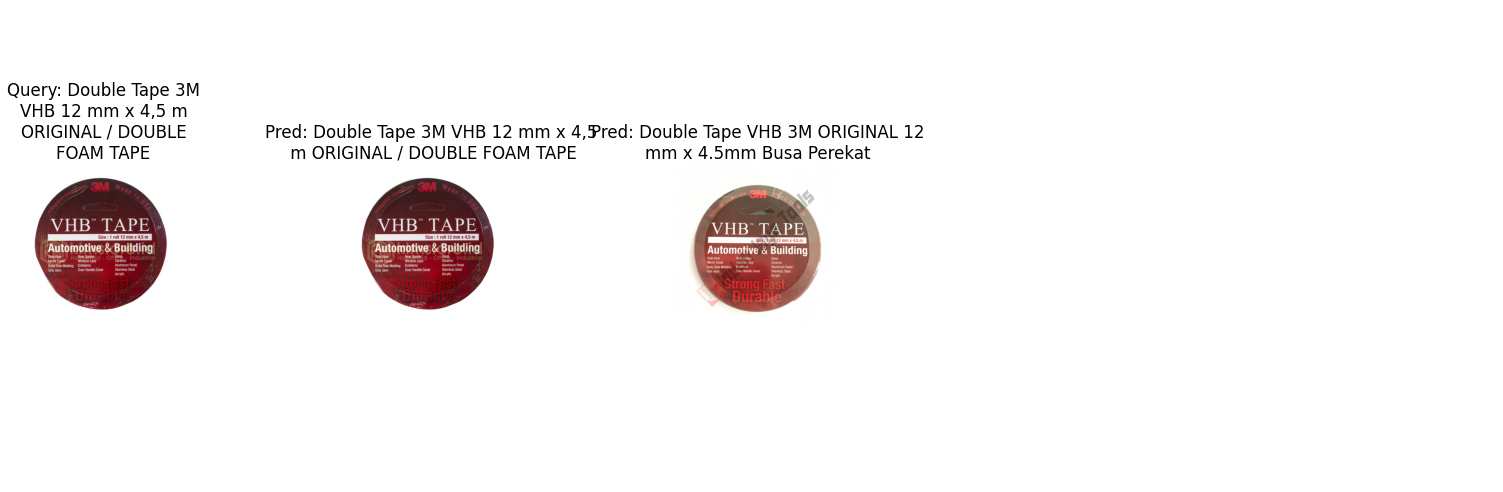

Processed prompts: 100%|██████████| 15/15 [00:08<00:00,  1.67it/s, est. speed input: 2506.41 toks/s, output: 1.67 toks/s]


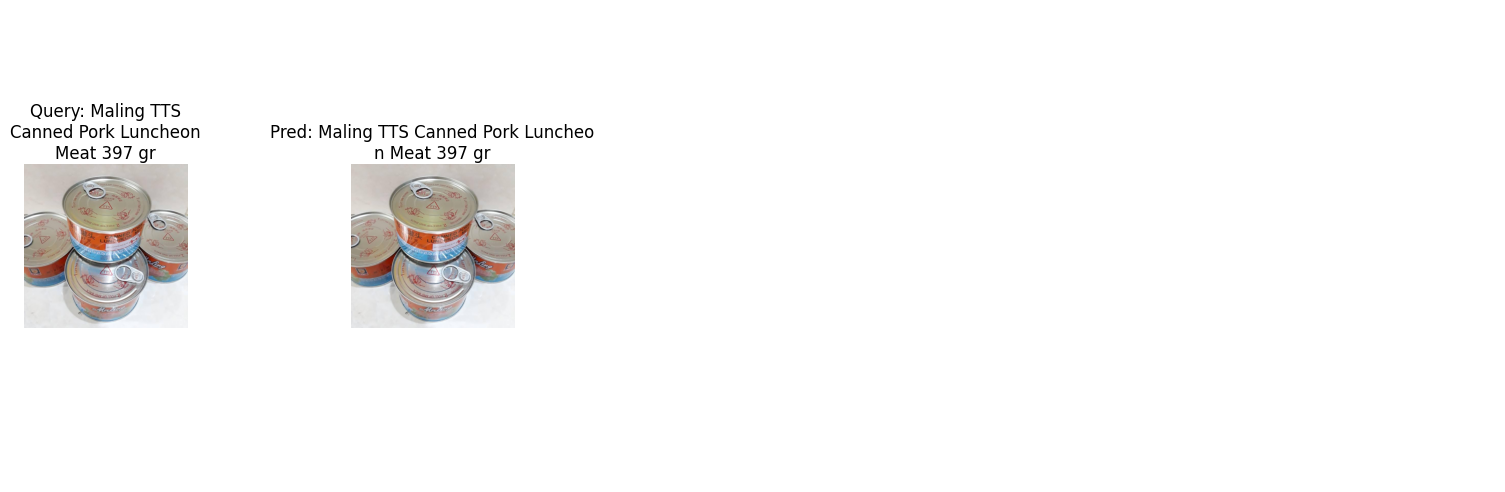

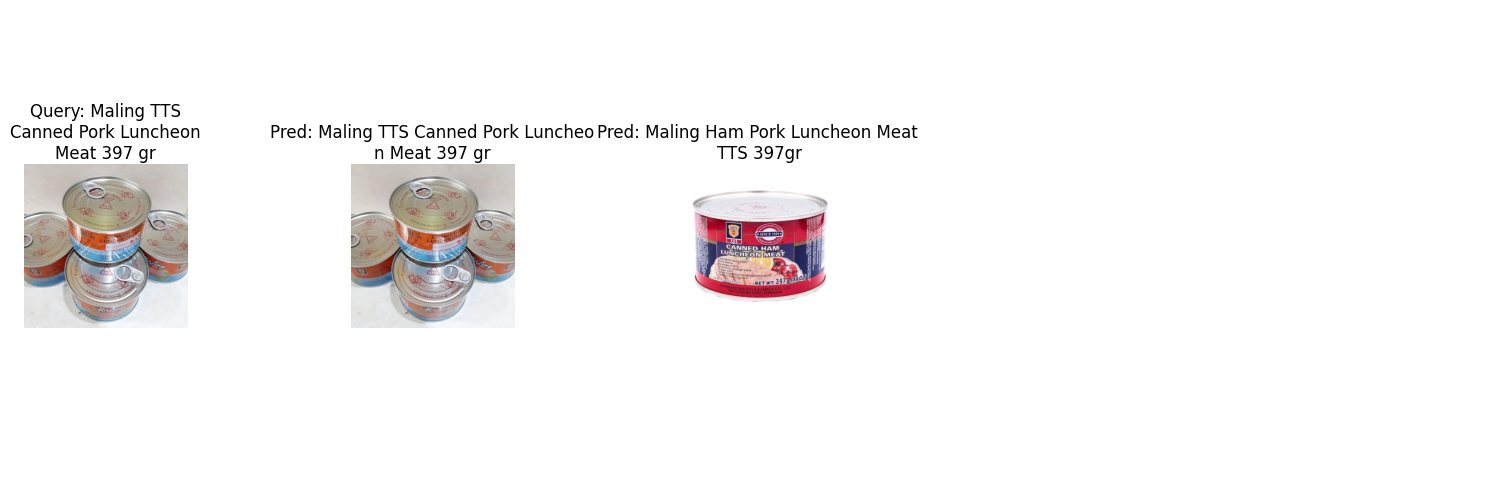

Processed prompts: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s, est. speed input: 2518.26 toks/s, output: 1.52 toks/s]


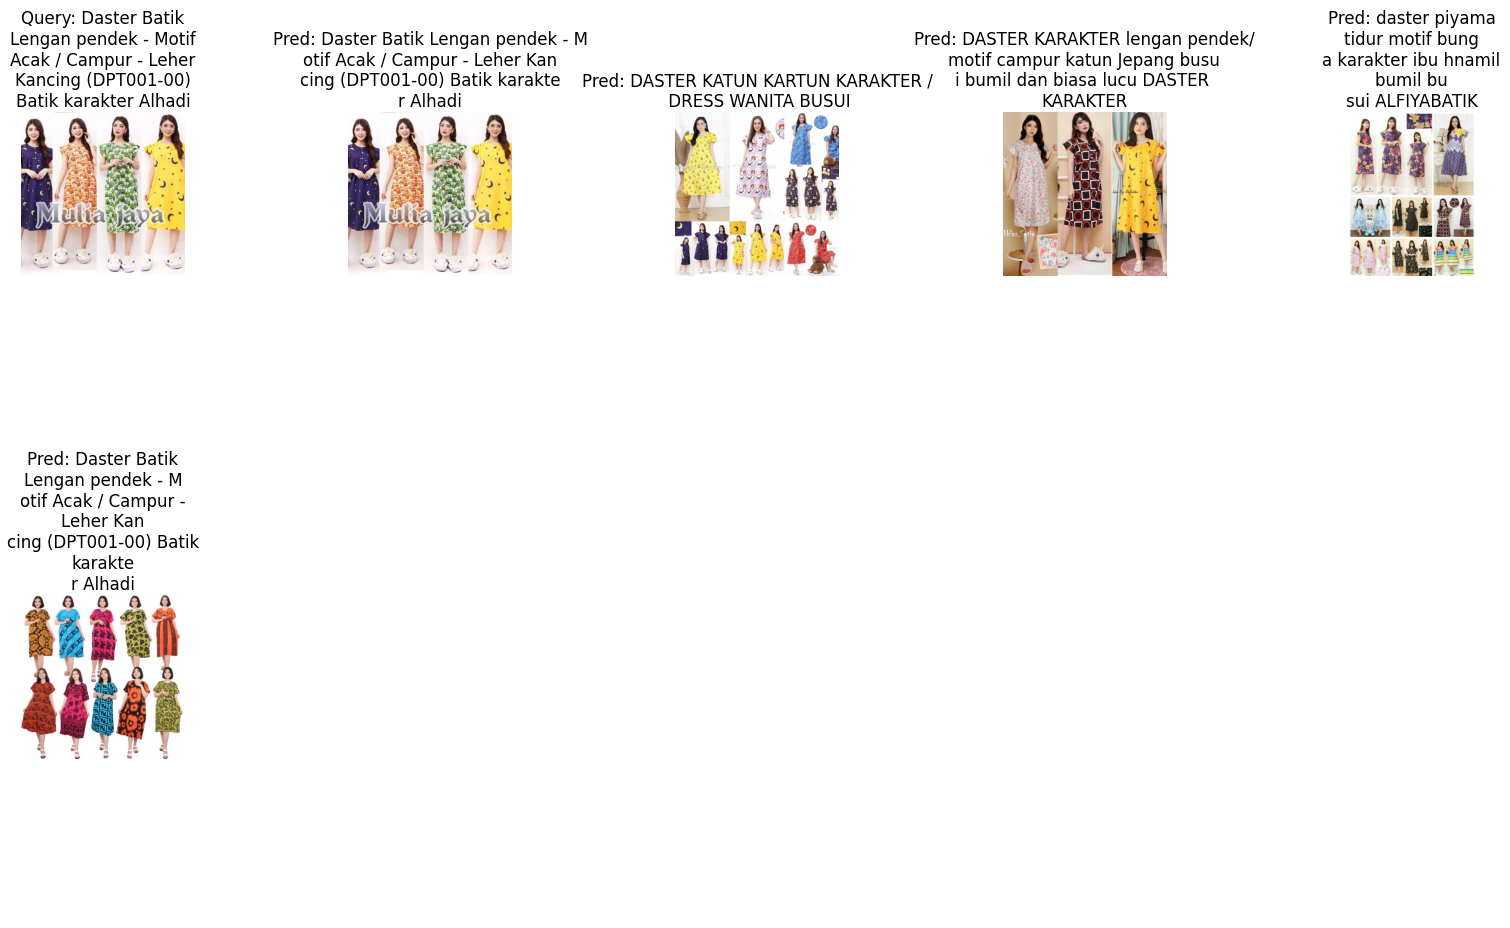

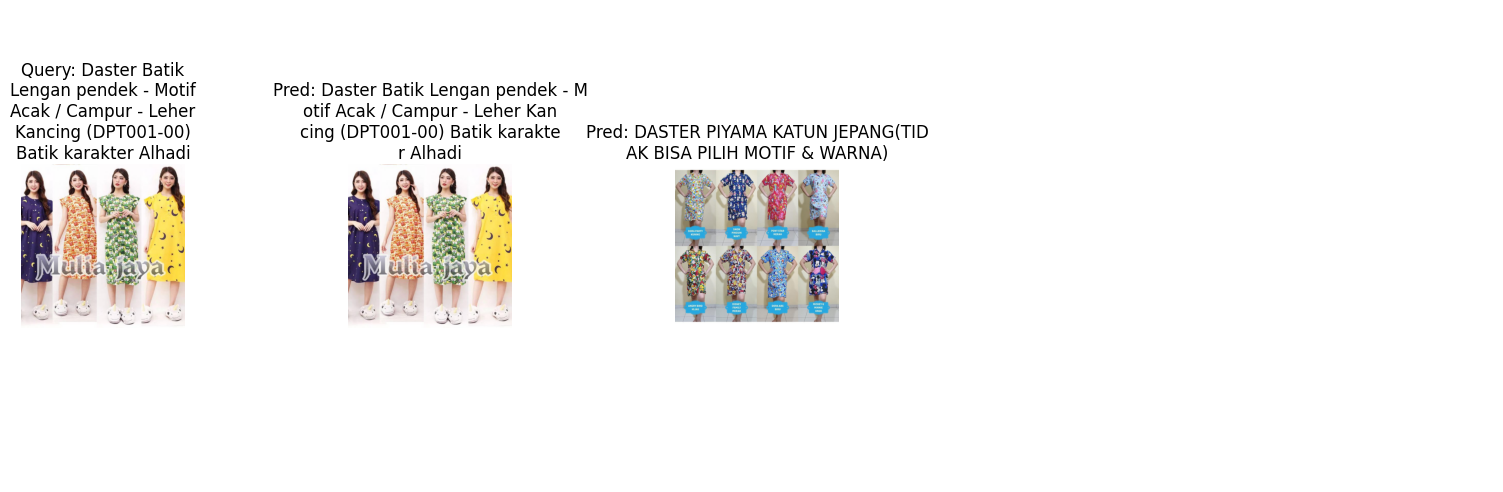

Processed prompts: 100%|██████████| 15/15 [00:09<00:00,  1.55it/s, est. speed input: 2509.32 toks/s, output: 1.55 toks/s]


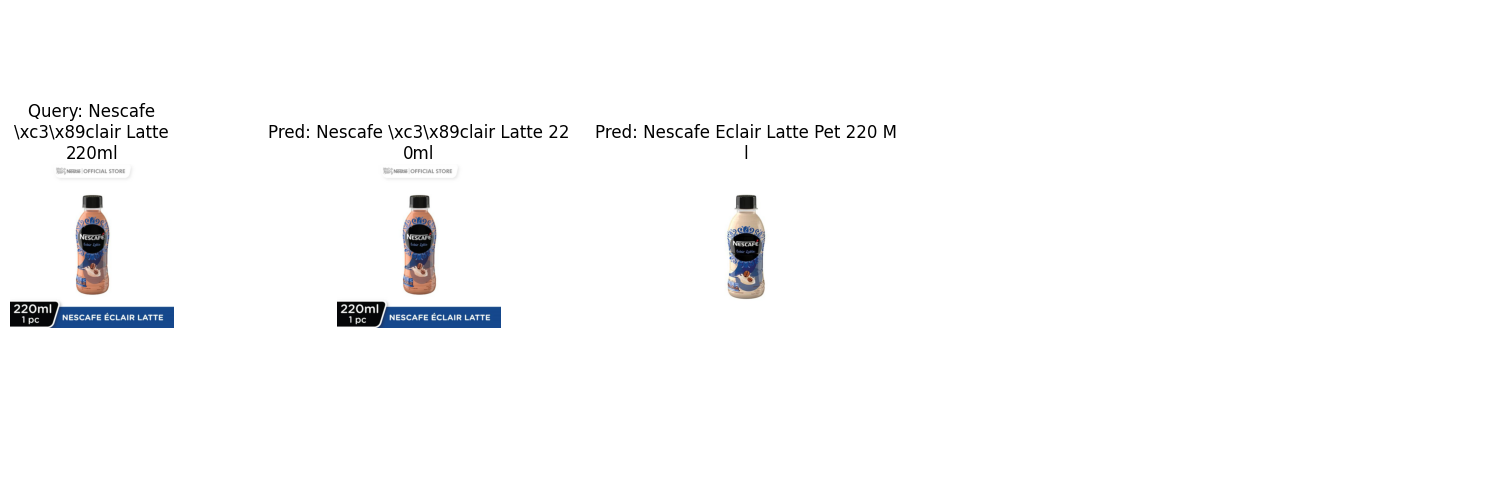

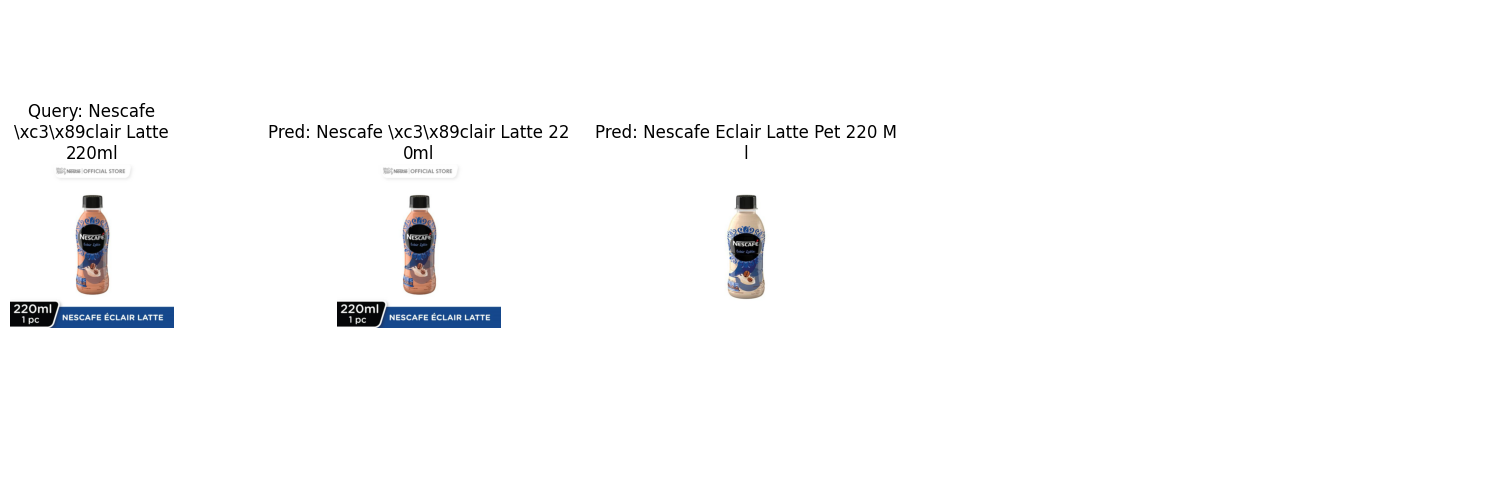

Processed prompts:   7%|▋         | 1/15 [00:03<00:50,  3.61s/it, est. speed input: 349.99 toks/s, output: 0.28 toks/s]

Processed prompts: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s, est. speed input: 2554.19 toks/s, output: 1.75 toks/s]


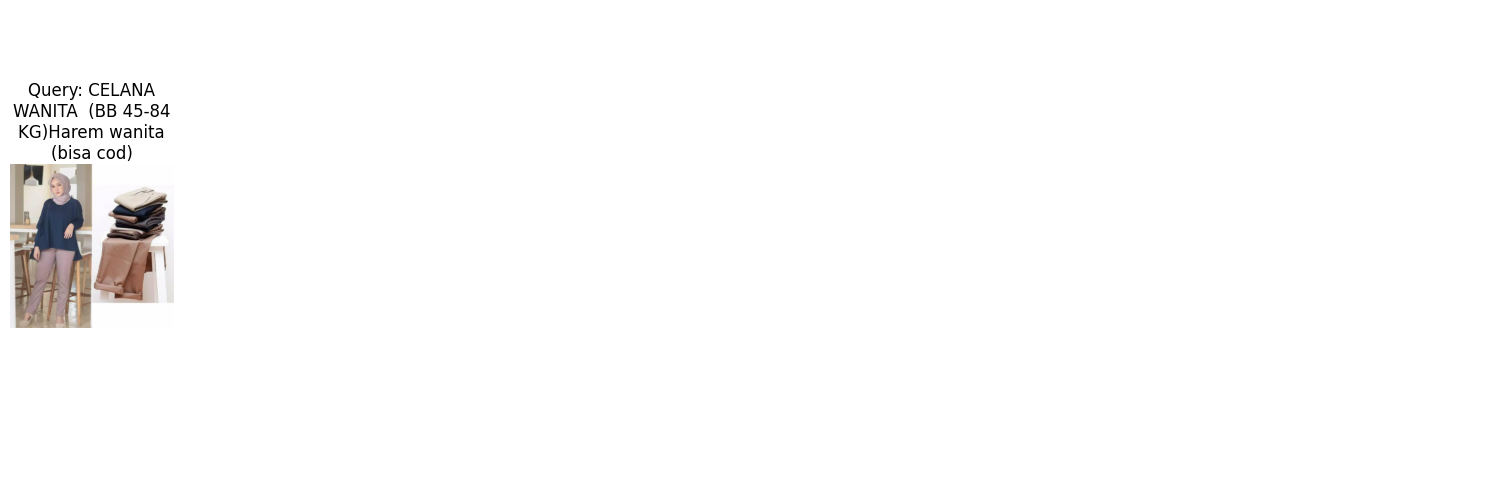

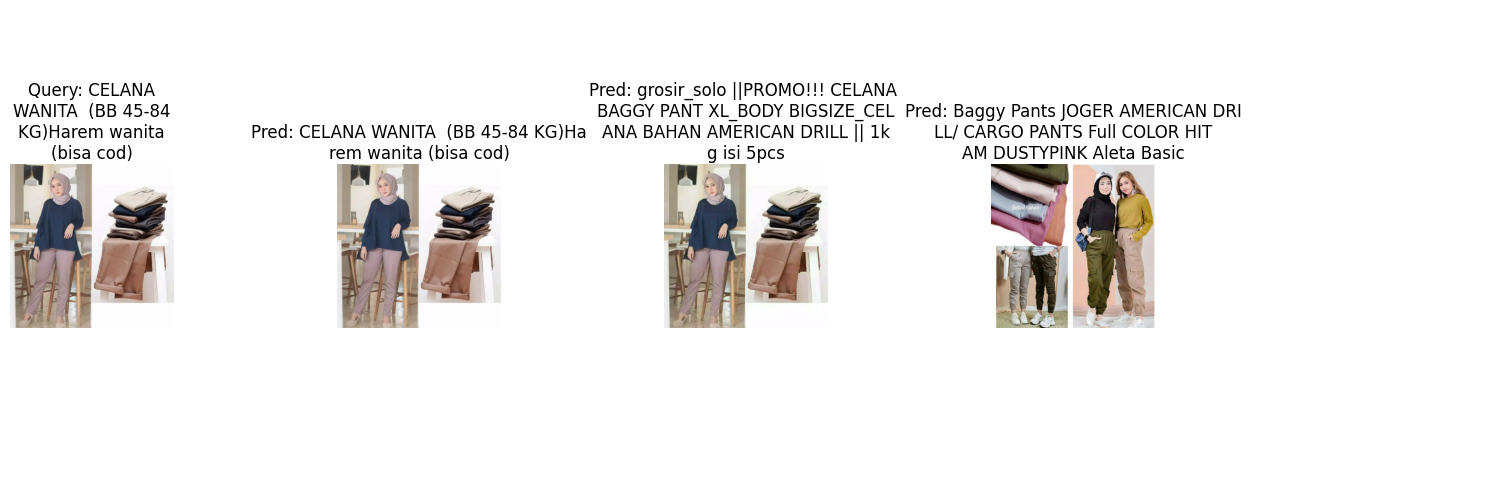

Processed prompts: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s, est. speed input: 2625.34 toks/s, output: 1.92 toks/s]


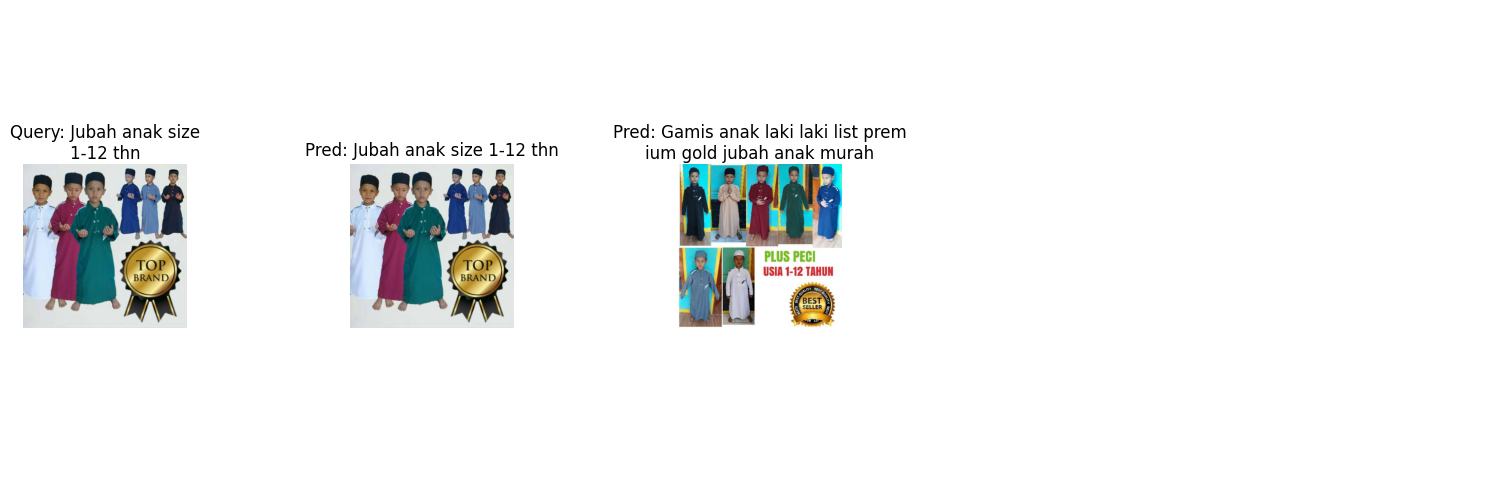

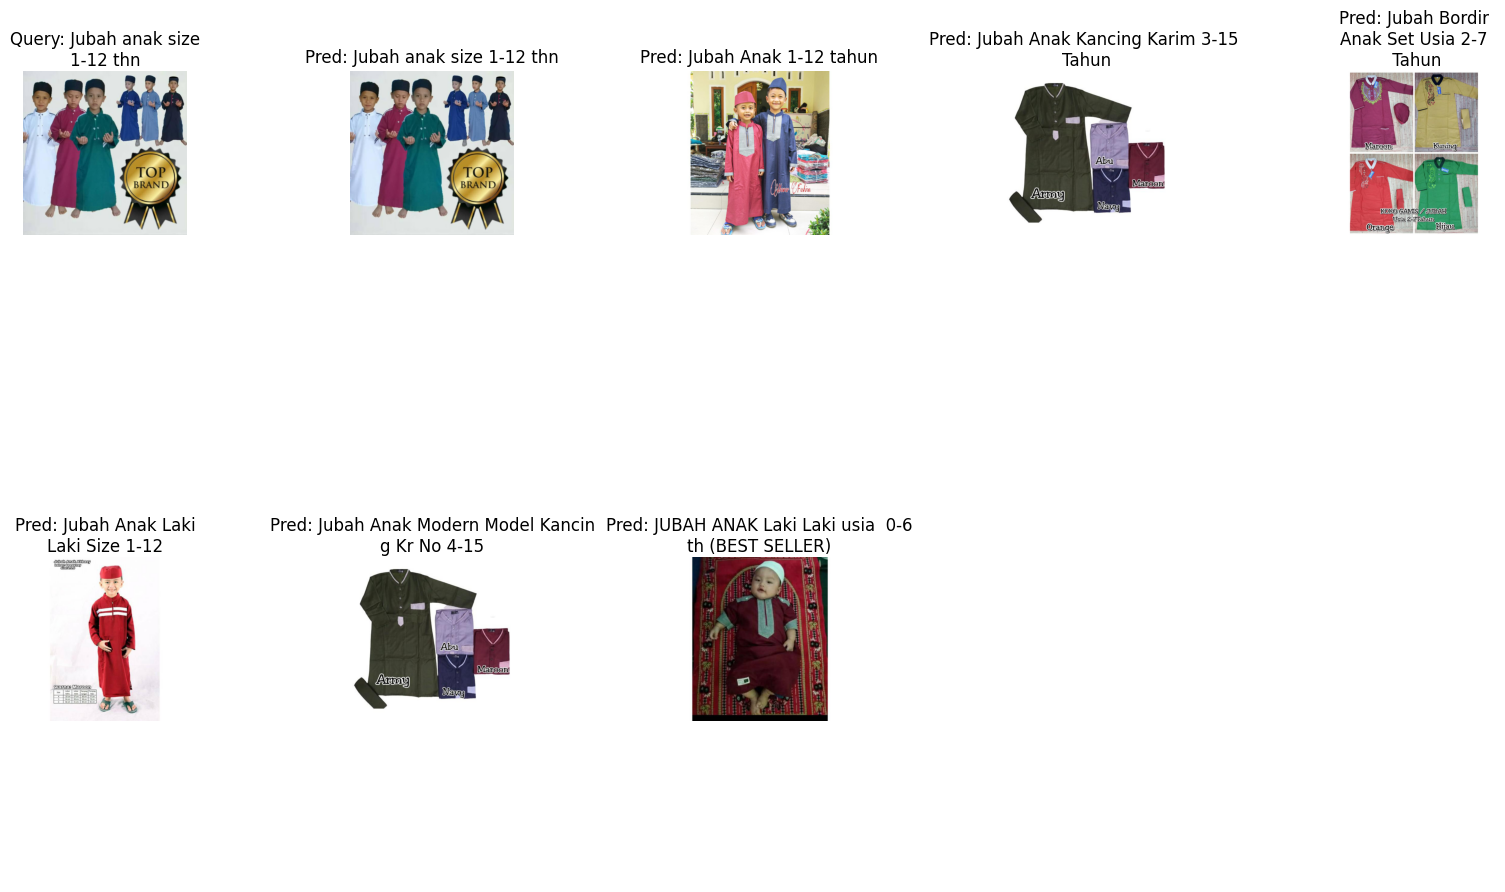

Processed prompts: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s, est. speed input: 2679.85 toks/s, output: 2.03 toks/s]


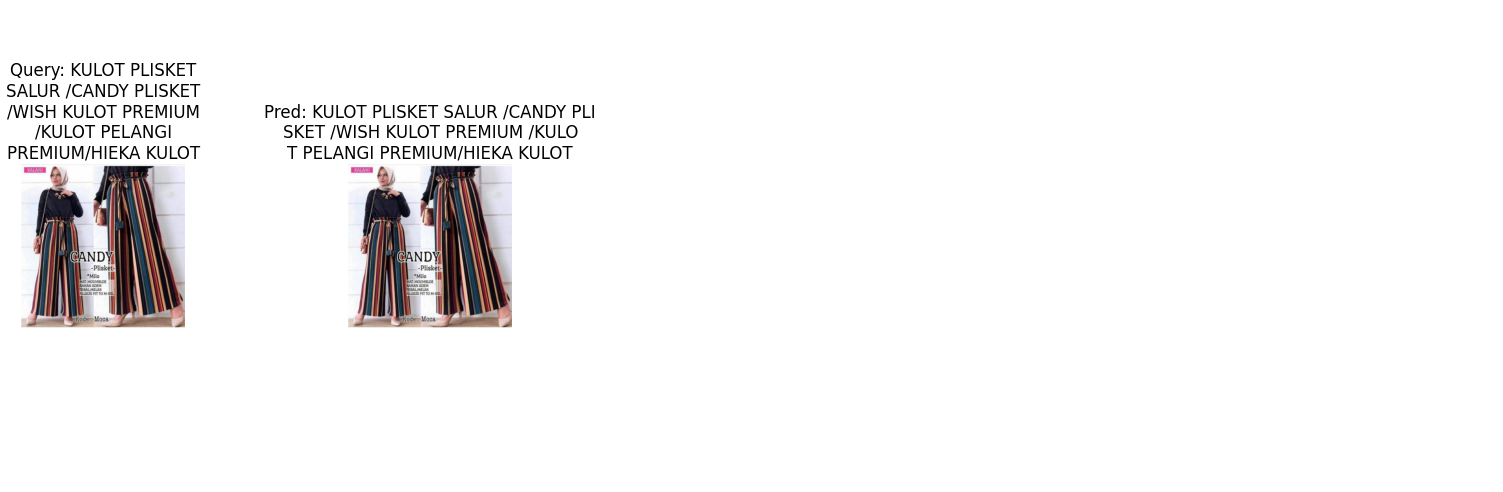

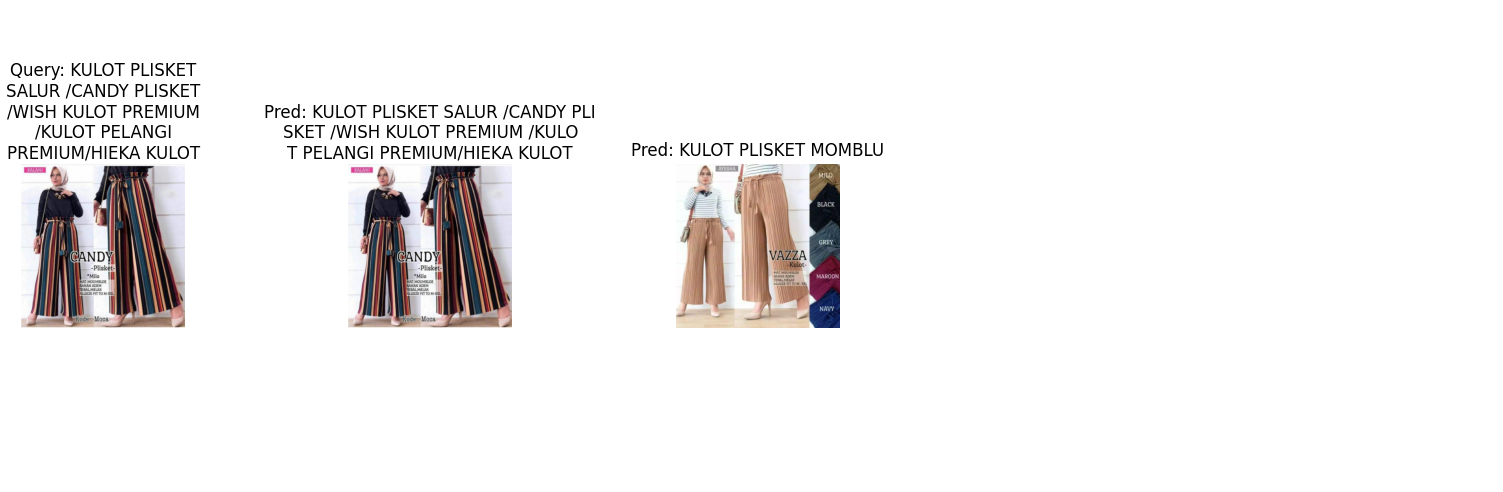

Processed prompts: 100%|██████████| 15/15 [00:05<00:00,  2.64it/s, est. speed input: 2696.56 toks/s, output: 2.64 toks/s]


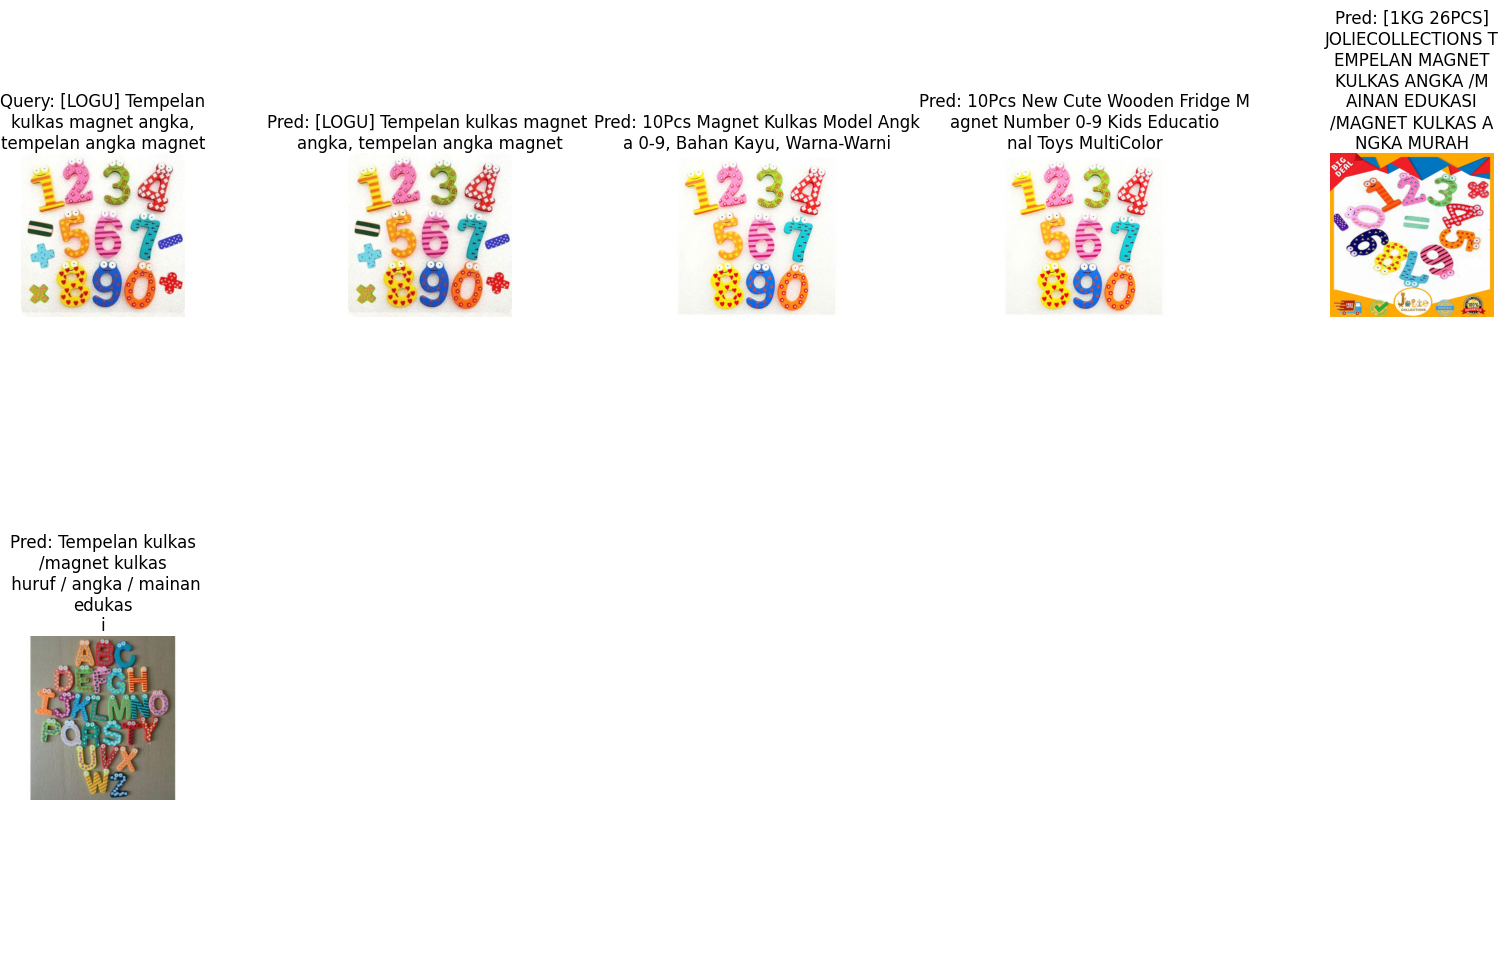

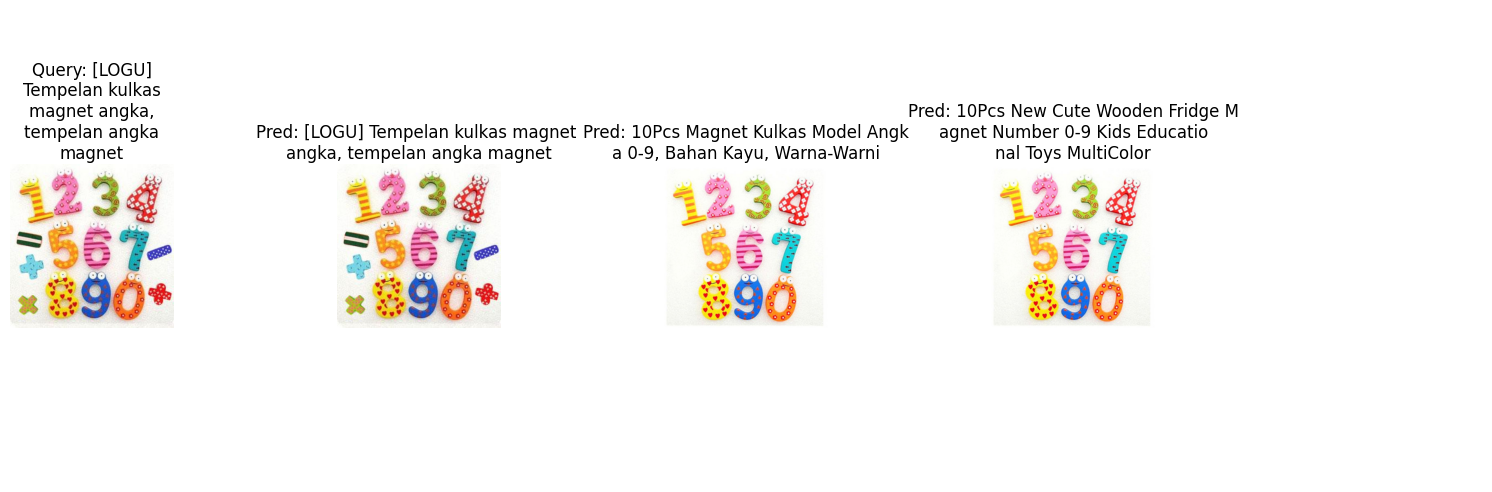

Processed prompts: 100%|██████████| 15/15 [00:08<00:00,  1.71it/s, est. speed input: 2615.23 toks/s, output: 1.71 toks/s]


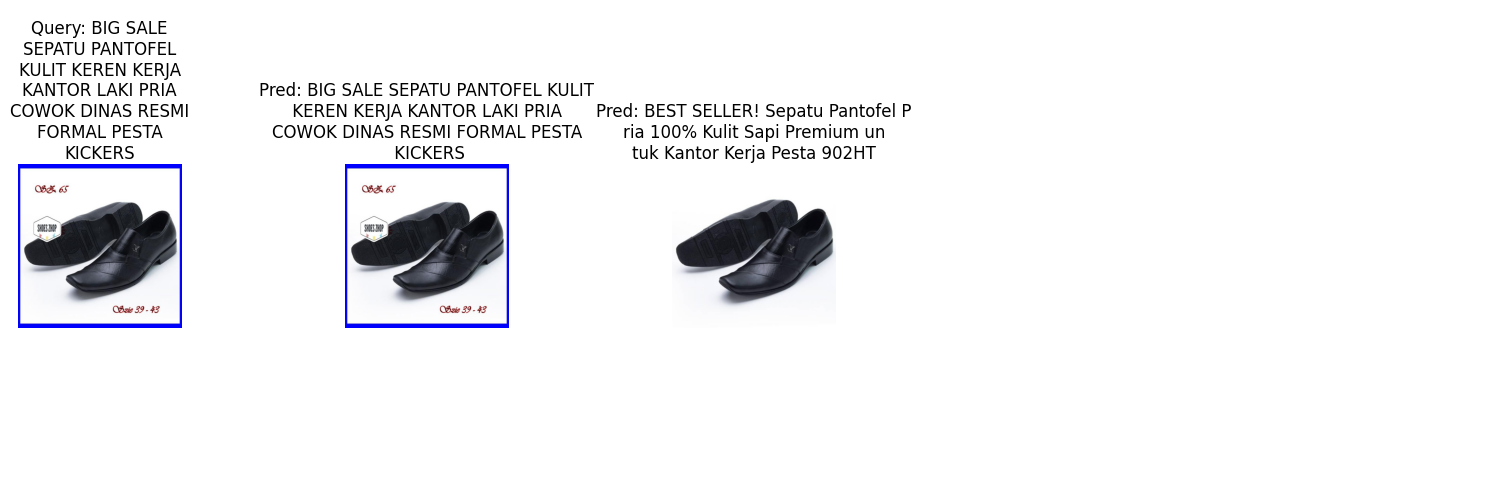

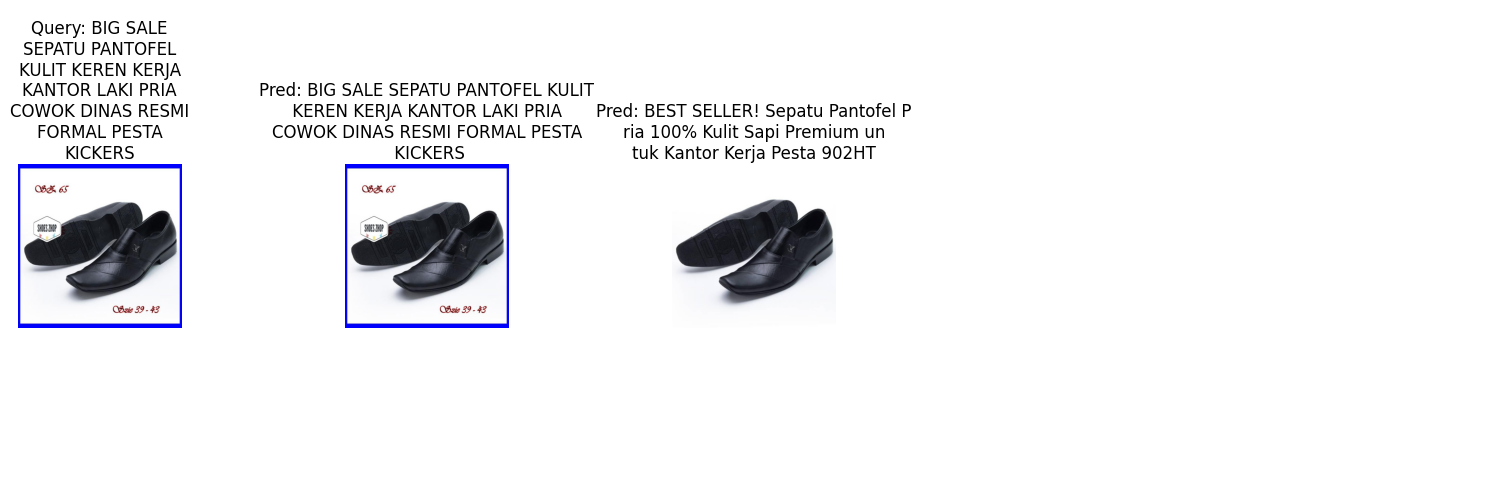

Processed prompts: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s, est. speed input: 2547.24 toks/s, output: 1.63 toks/s]


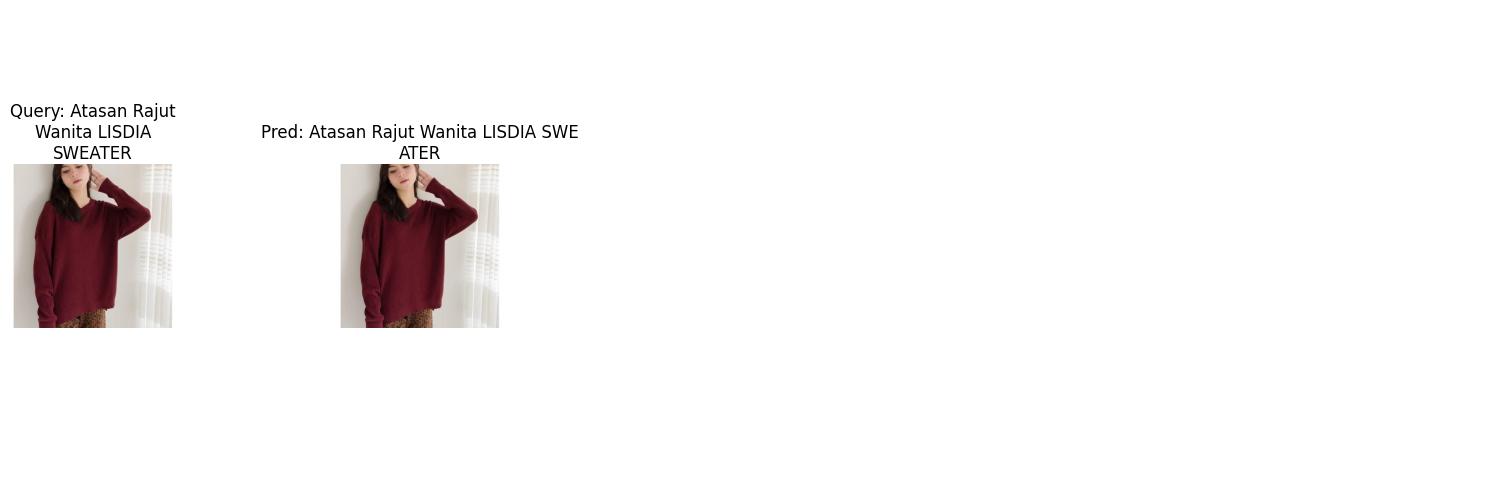

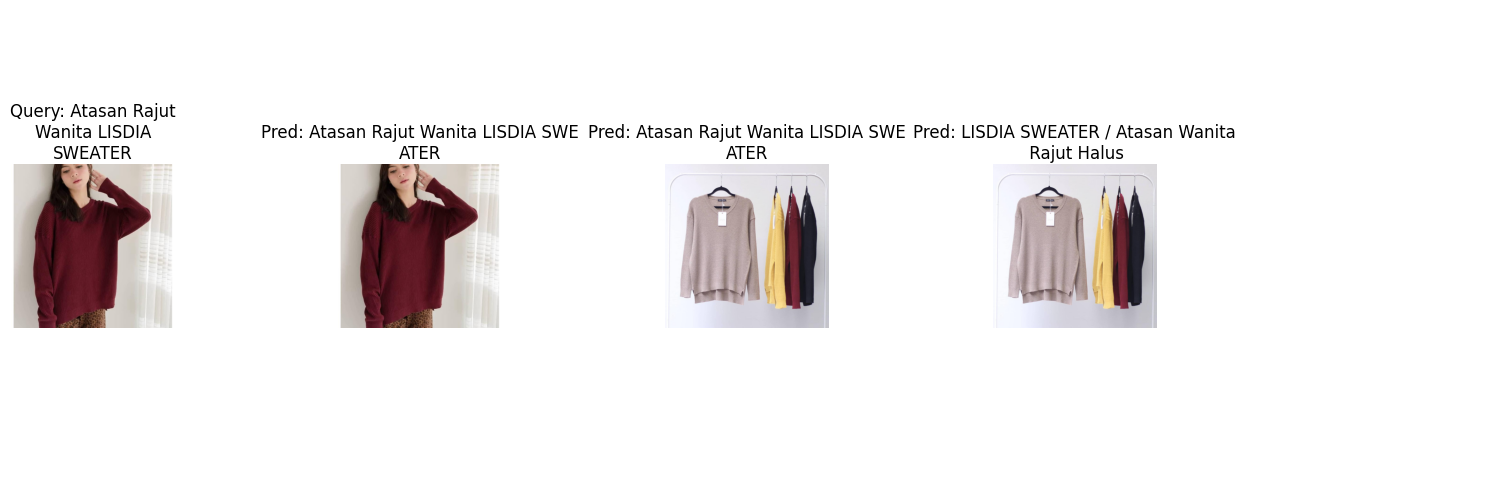

Processed prompts: 100%|██████████| 15/15 [00:14<00:00,  1.01it/s, est. speed input: 2262.93 toks/s, output: 1.01 toks/s]


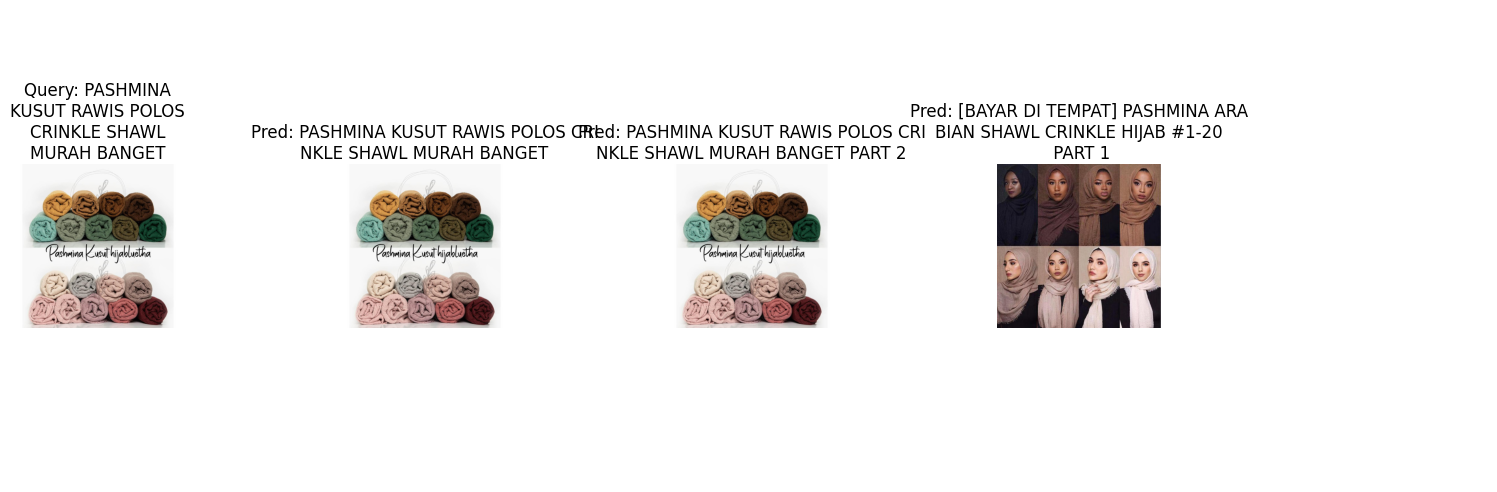

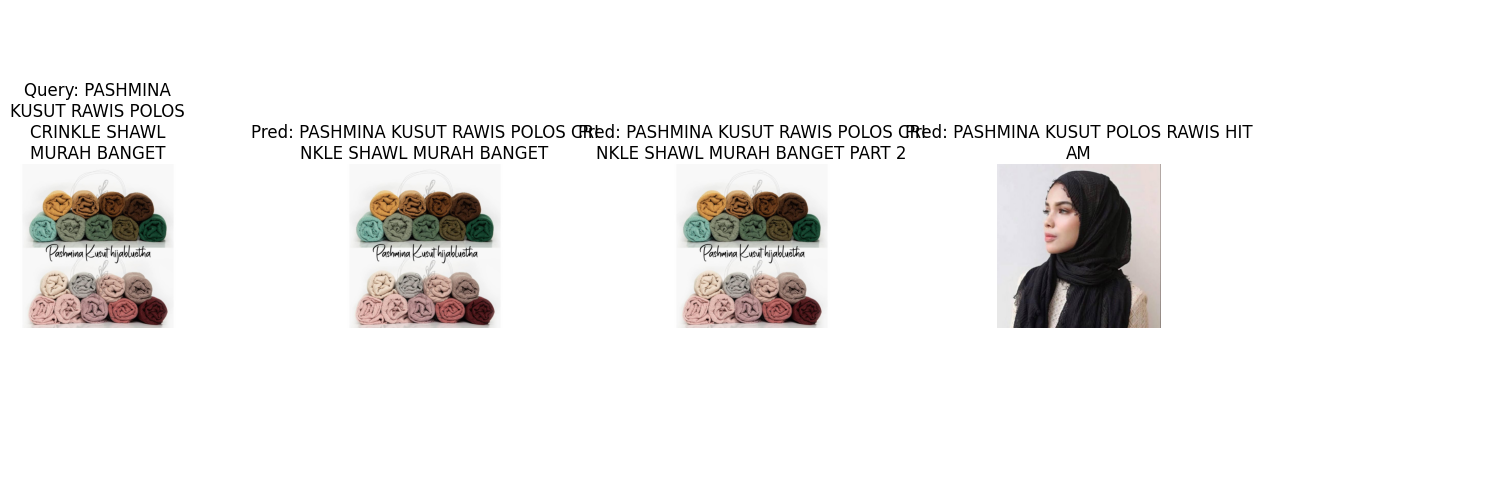

Processed prompts: 100%|██████████| 15/15 [00:15<00:00,  1.01s/it, est. speed input: 2261.03 toks/s, output: 0.99 toks/s]


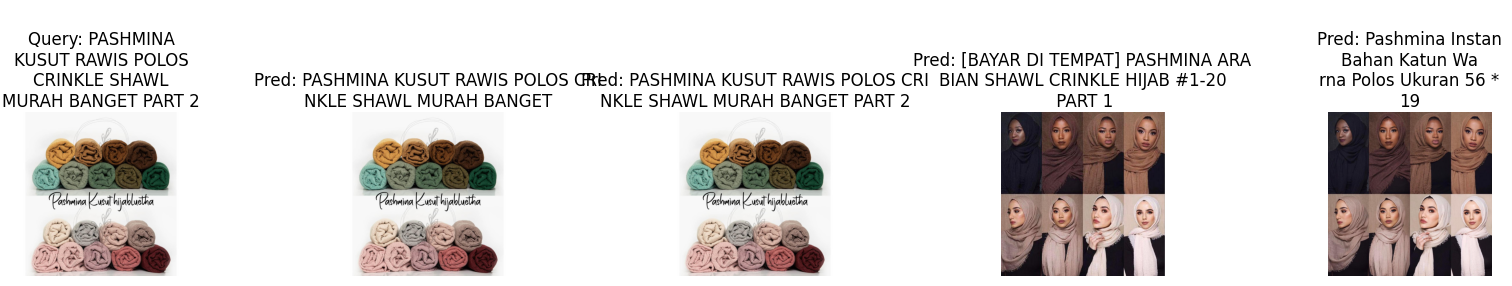

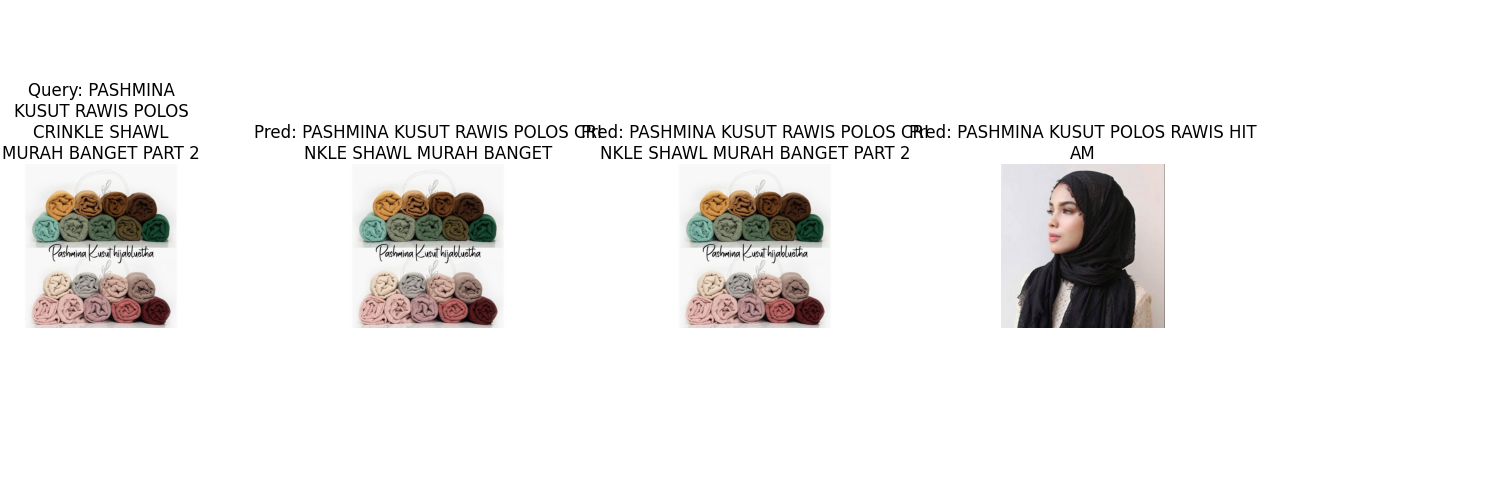

Processed prompts: 100%|██████████| 15/15 [00:06<00:00,  2.45it/s, est. speed input: 2705.86 toks/s, output: 2.45 toks/s]


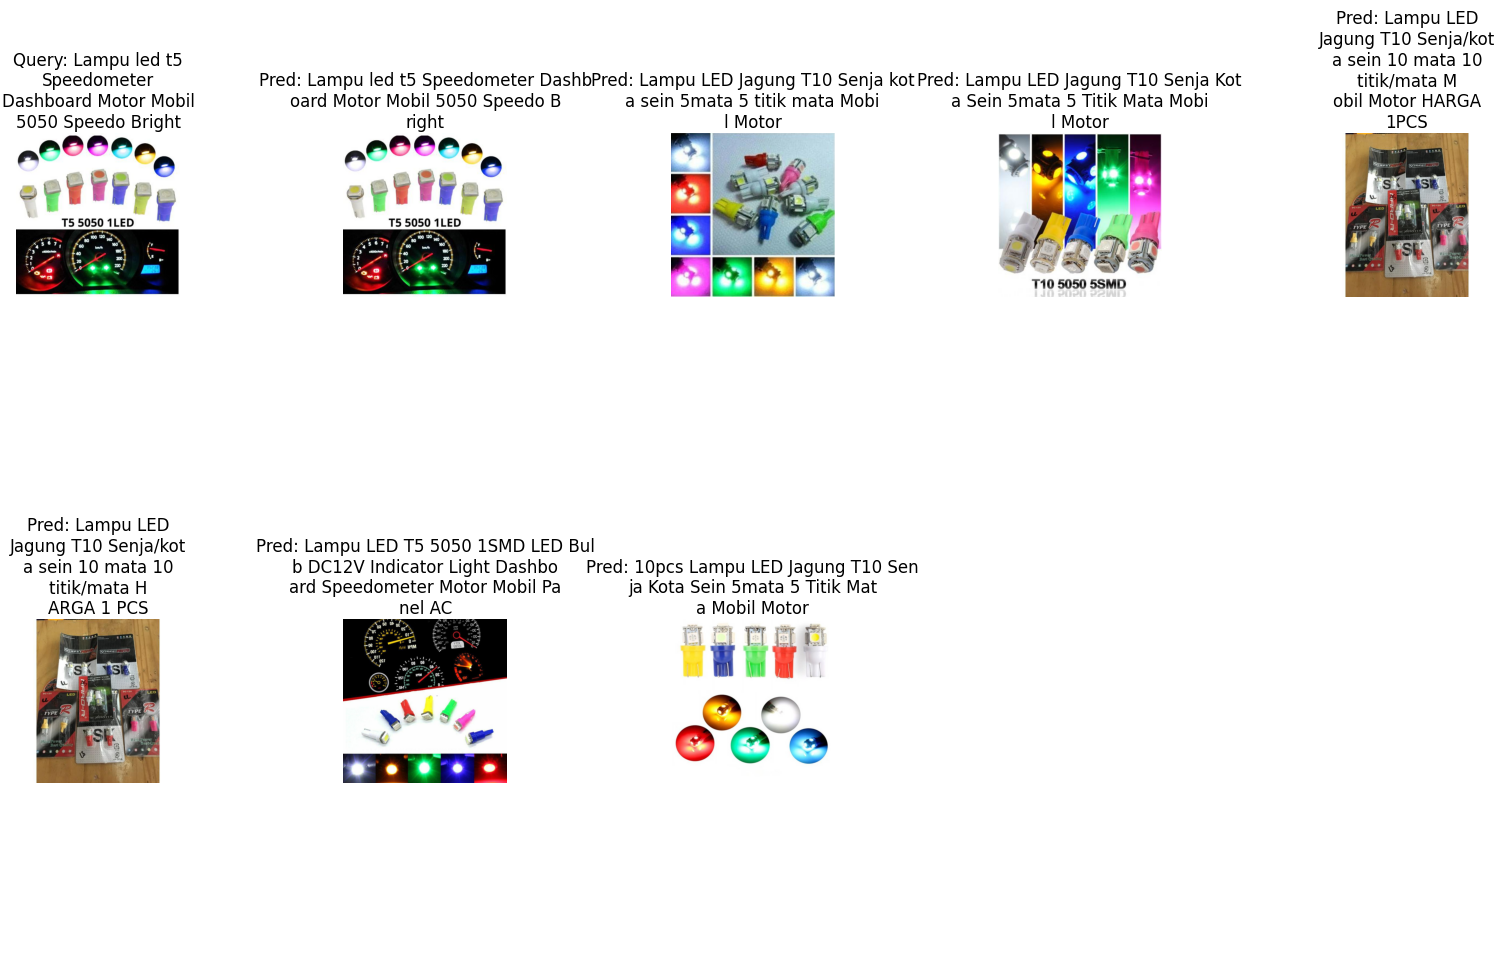

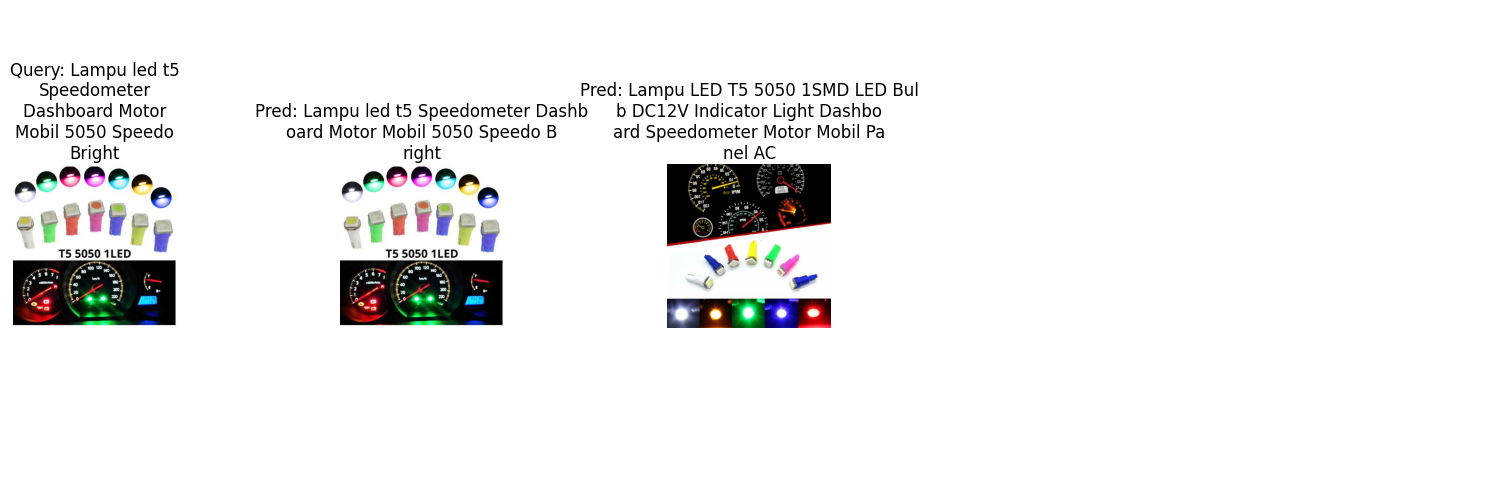

Processed prompts: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s, est. speed input: 2538.69 toks/s, output: 1.70 toks/s]


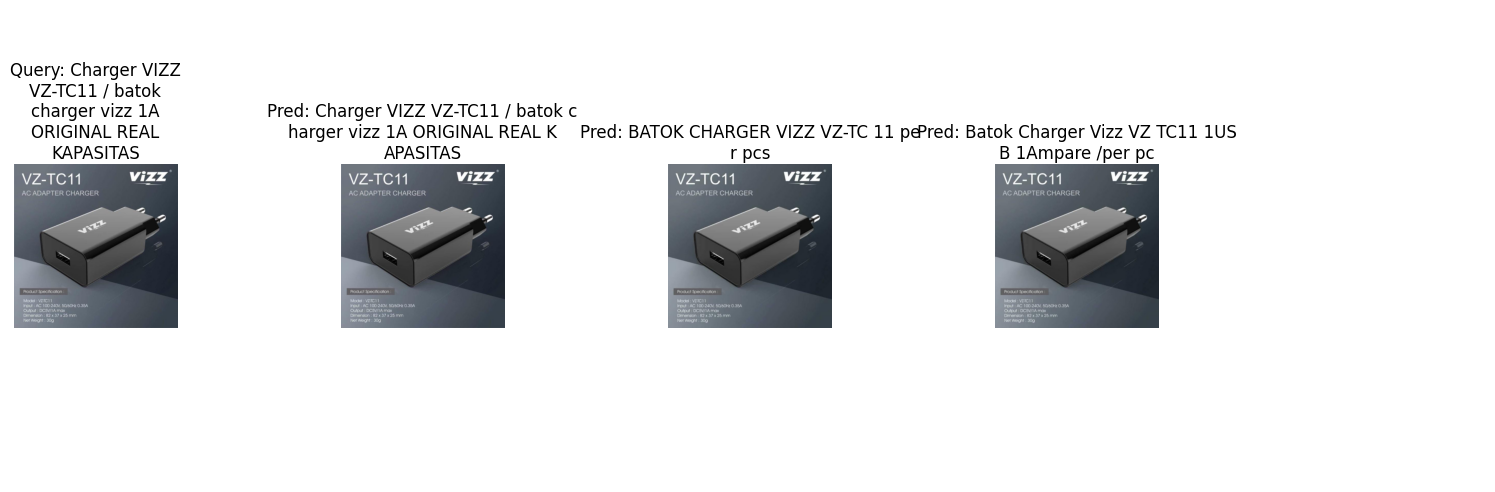

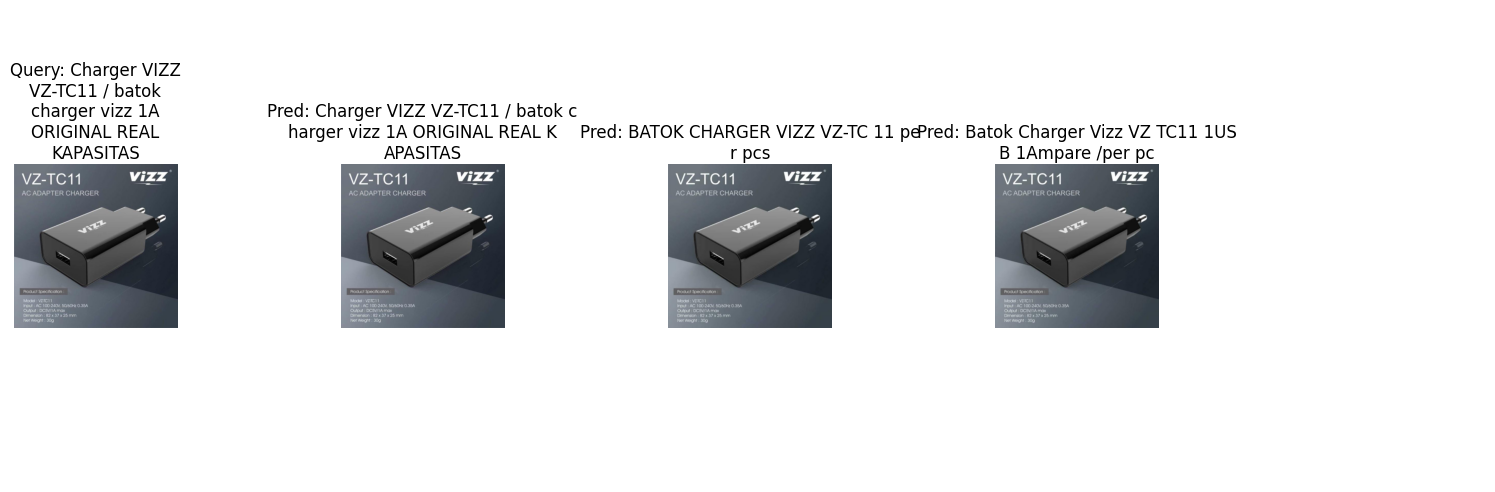

Processed prompts: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s, est. speed input: 2459.07 toks/s, output: 1.57 toks/s]


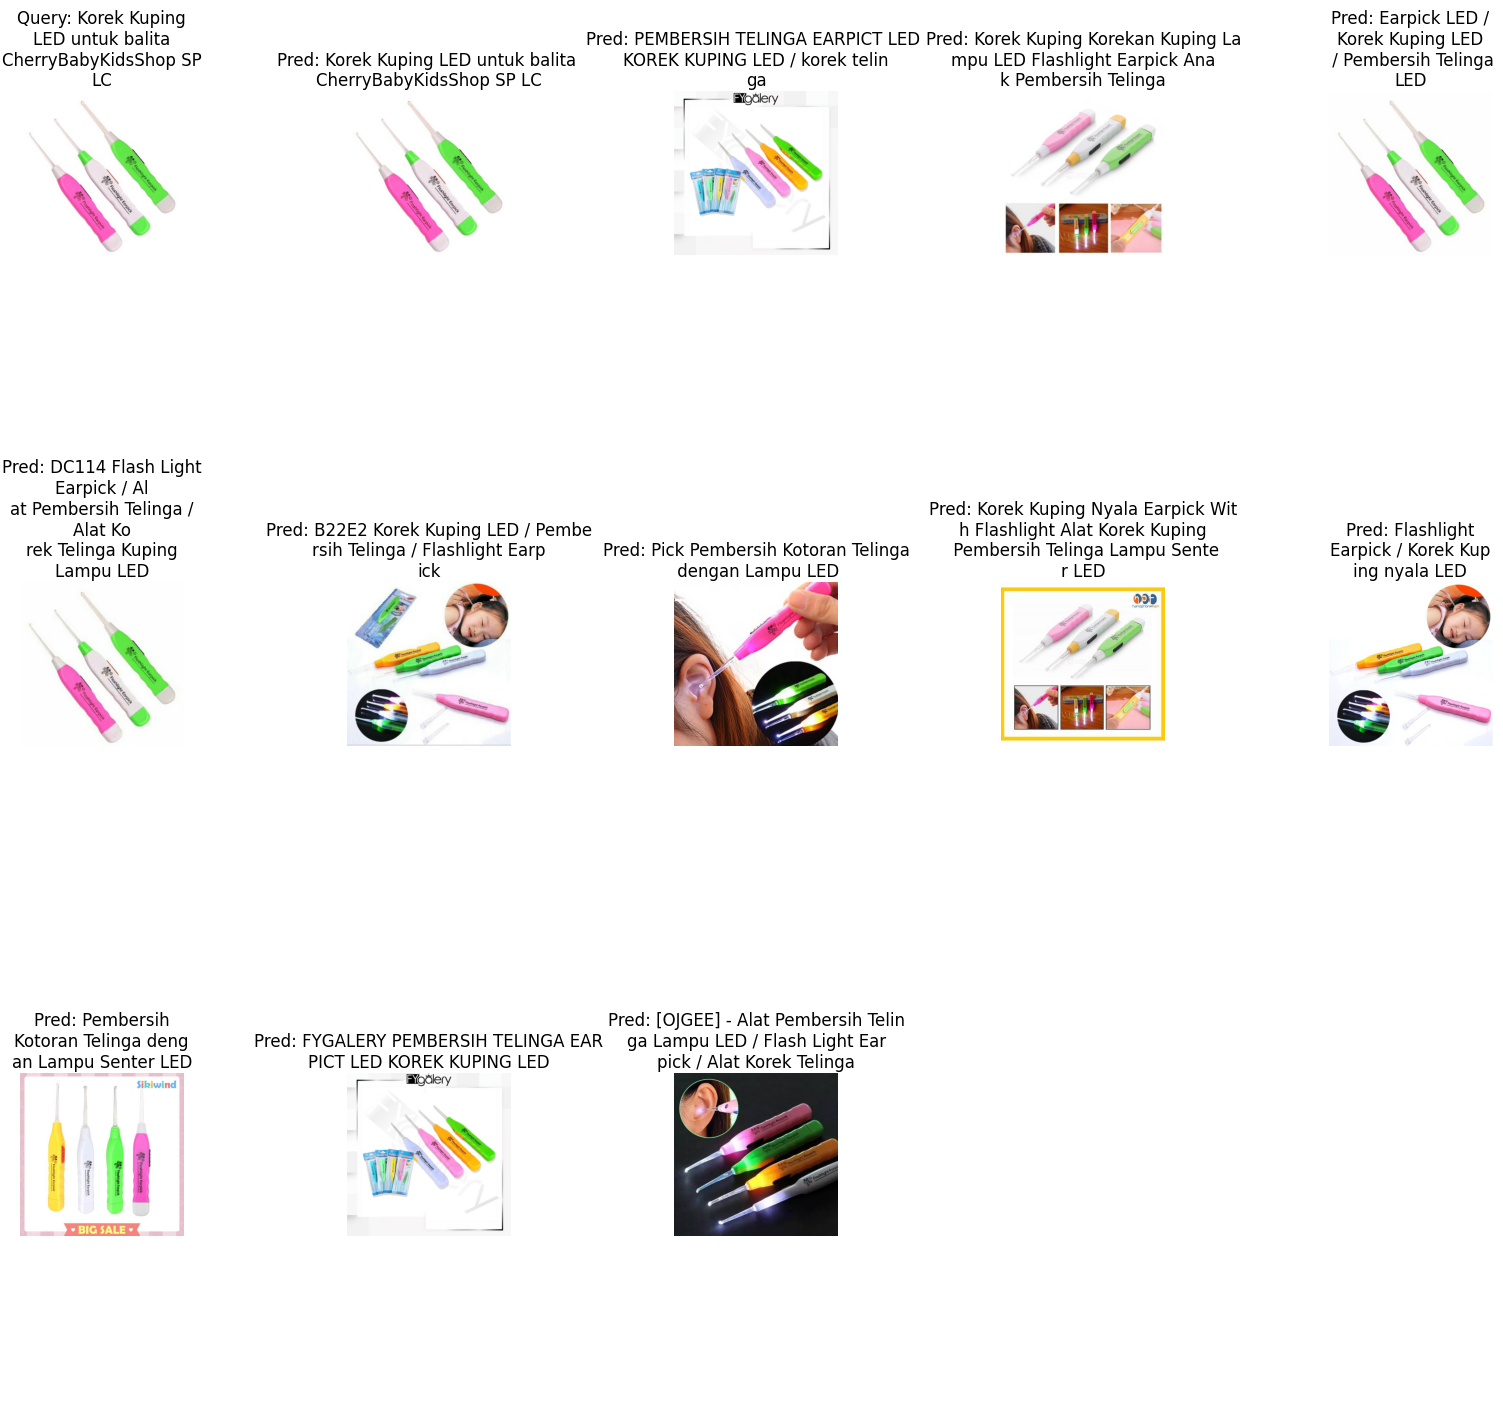

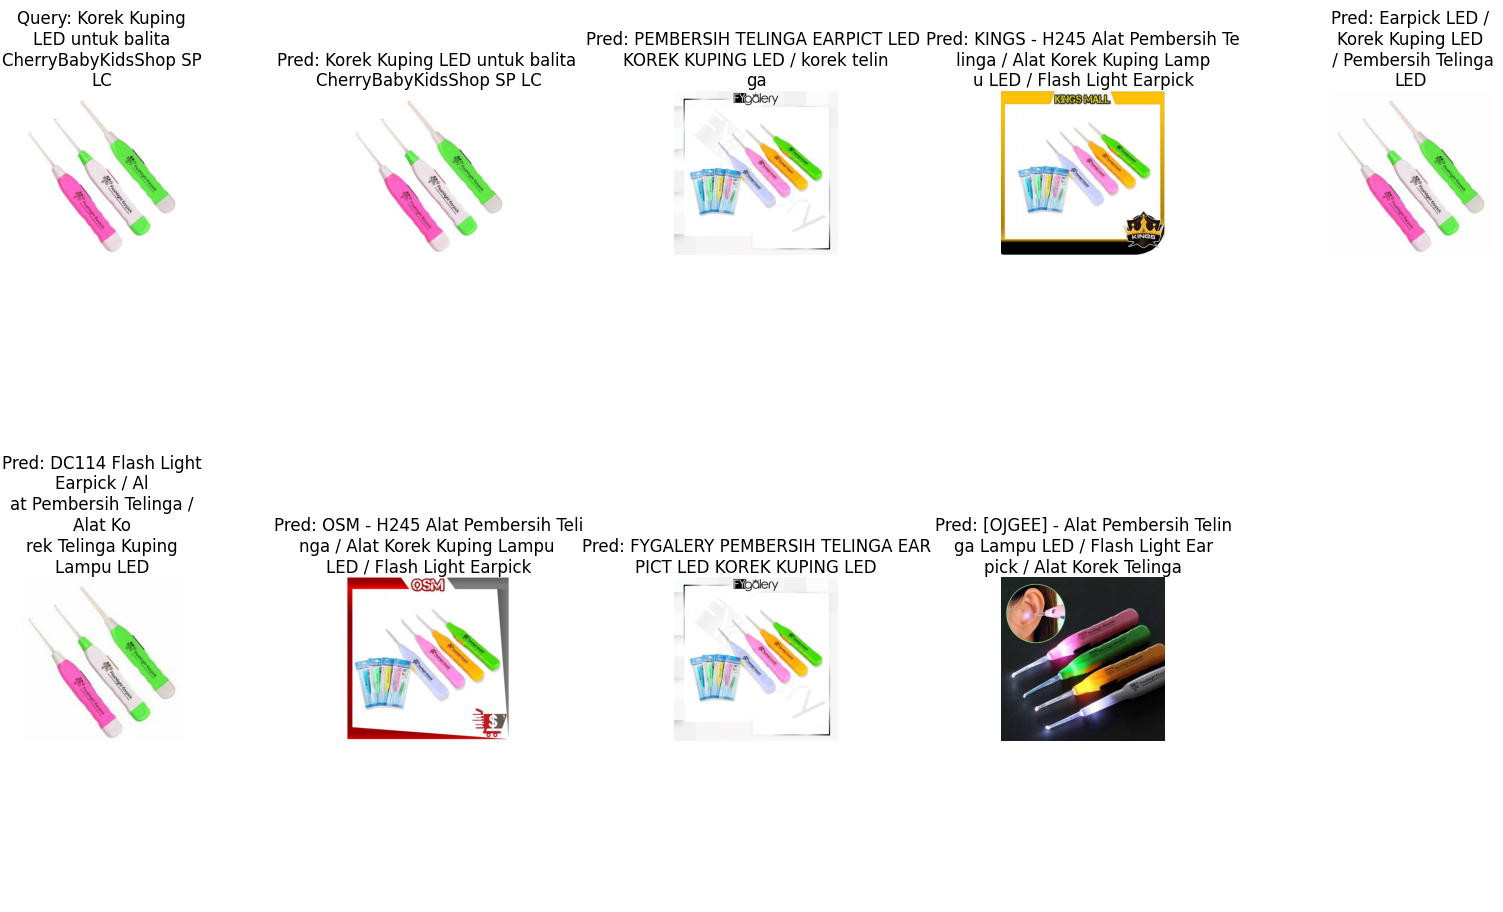

Processed prompts: 100%|██████████| 15/15 [00:16<00:00,  1.07s/it, est. speed input: 2237.26 toks/s, output: 0.94 toks/s]


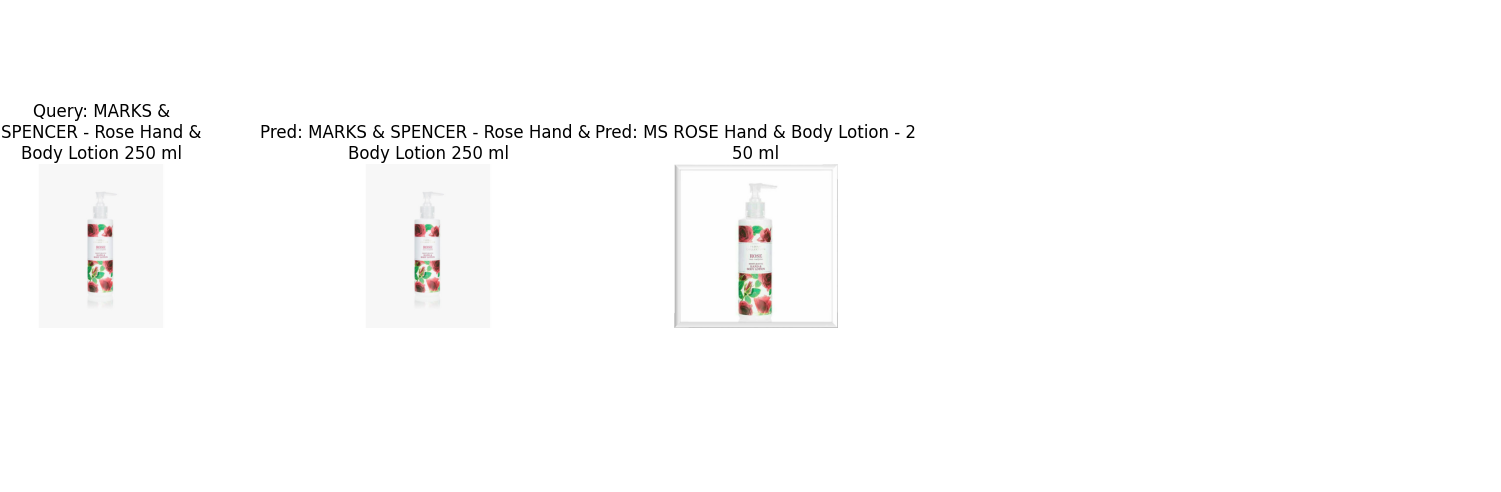

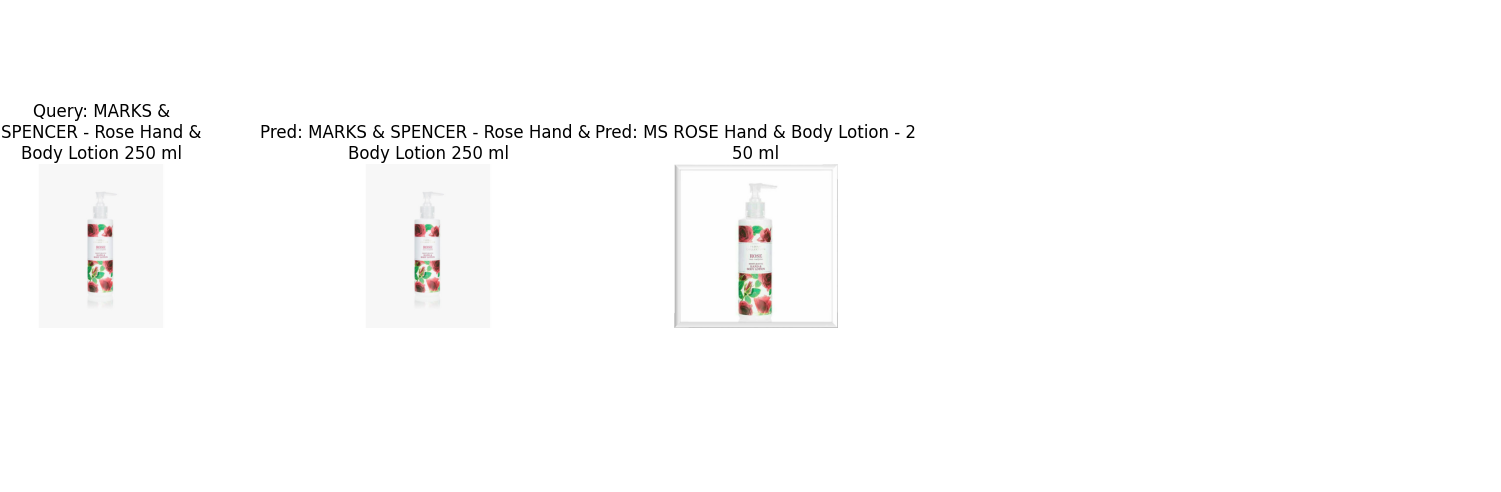

Processed prompts: 100%|██████████| 15/15 [00:12<00:00,  1.22it/s, est. speed input: 2381.98 toks/s, output: 1.22 toks/s]


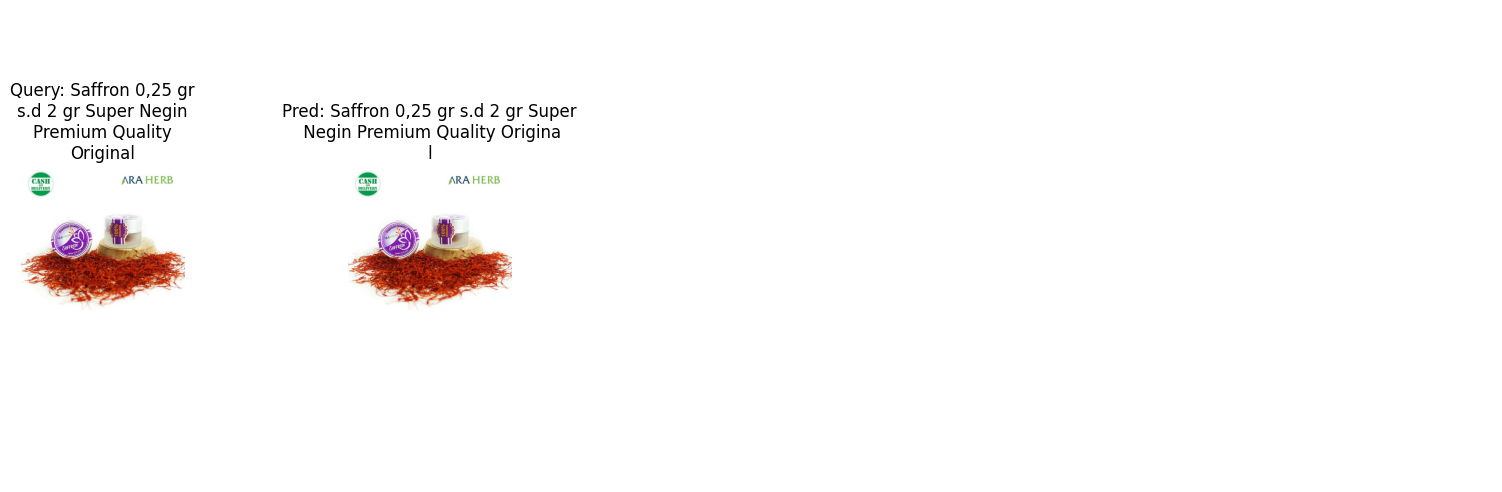

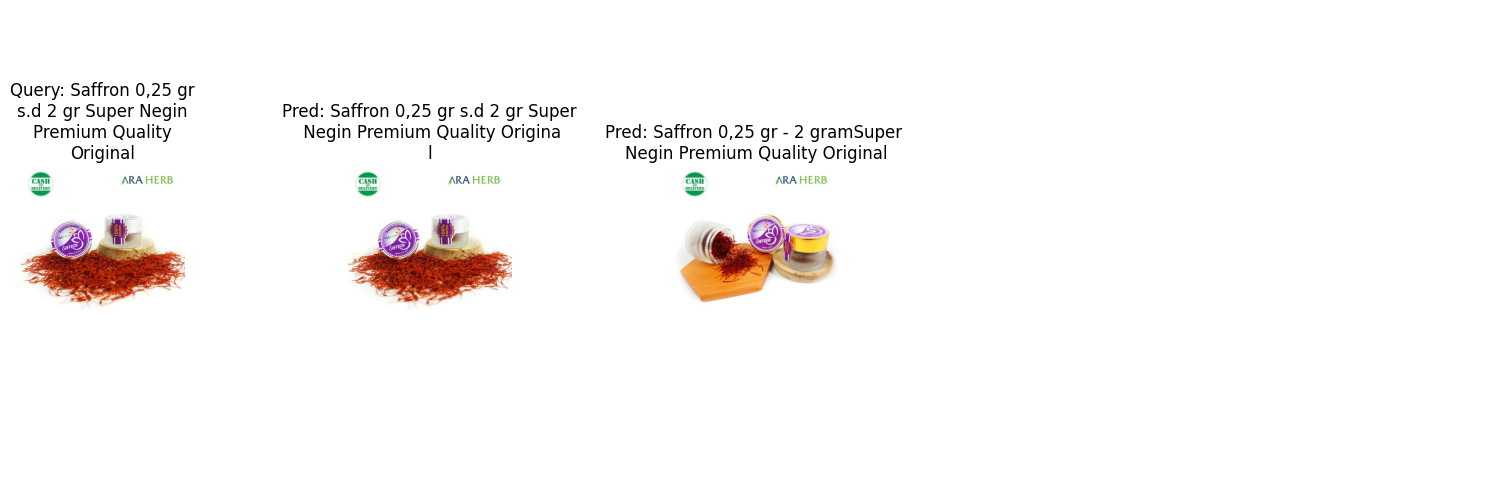

Processed prompts: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s, est. speed input: 2733.25 toks/s, output: 3.03 toks/s]


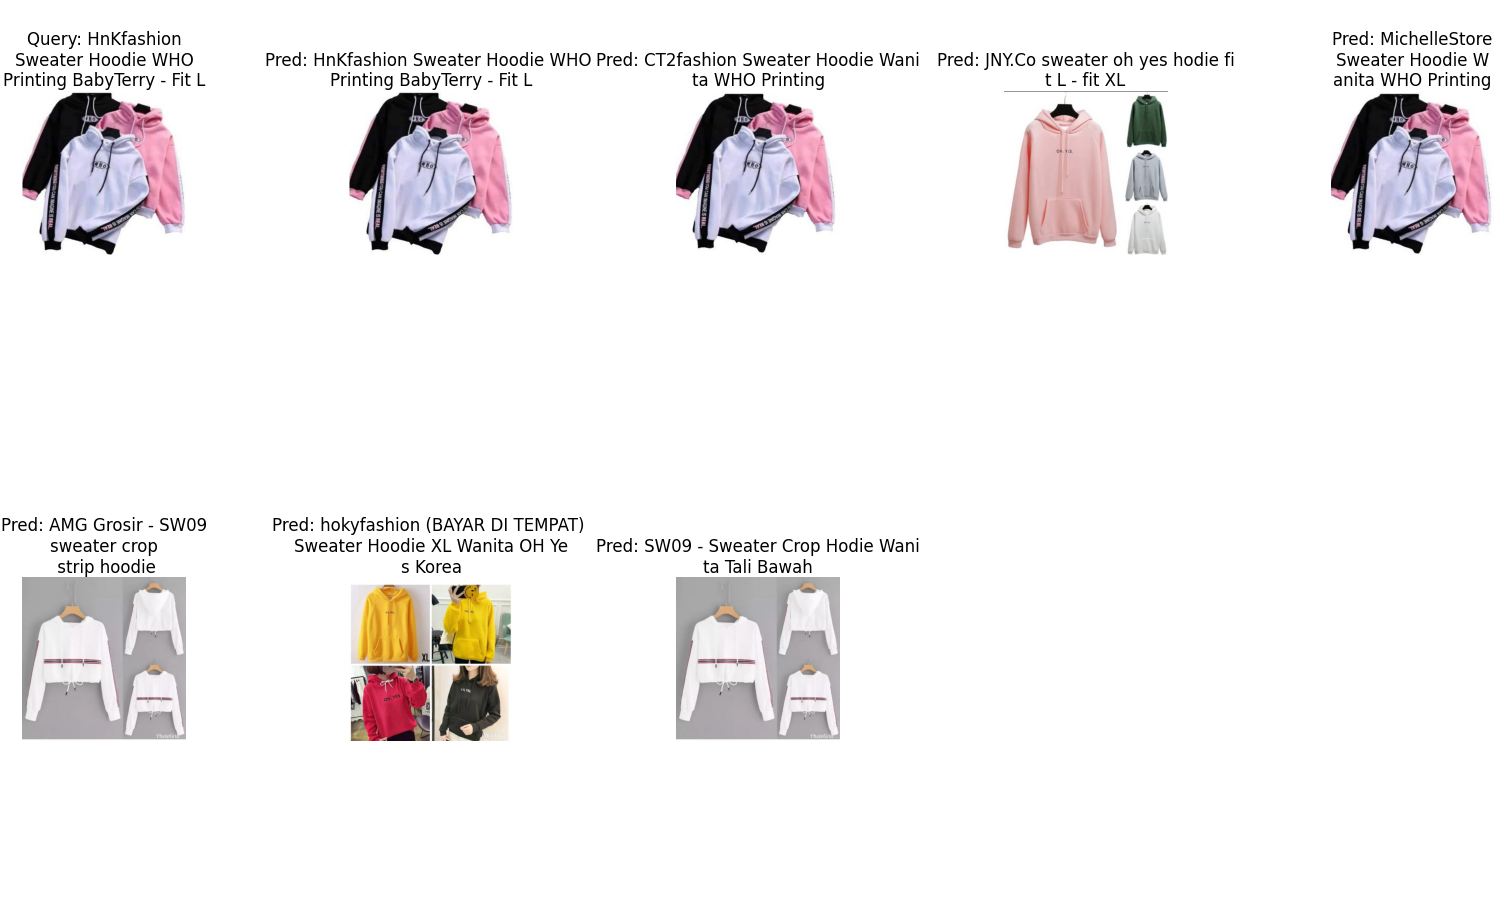

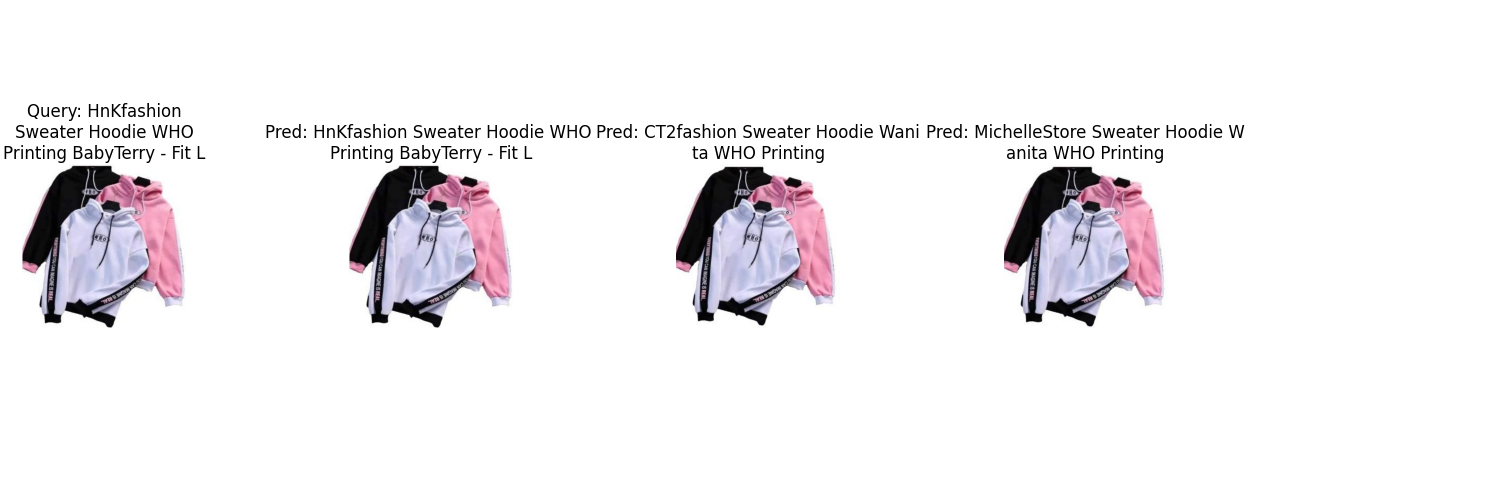

Processed prompts: 100%|██████████| 15/15 [00:09<00:00,  1.62it/s, est. speed input: 2422.34 toks/s, output: 1.62 toks/s]


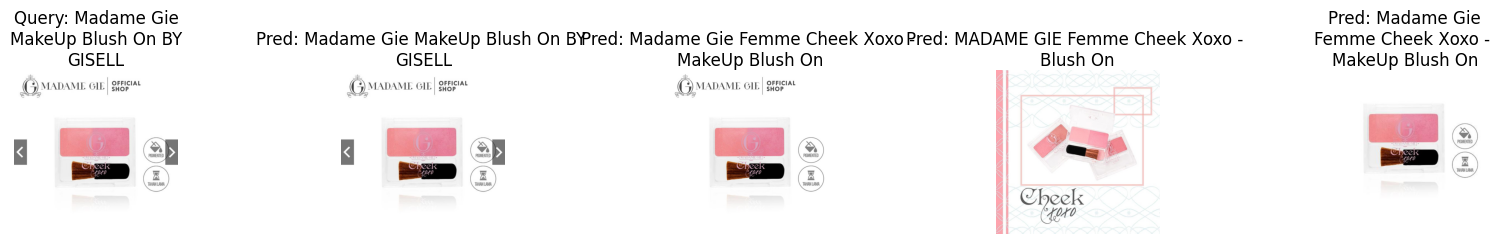

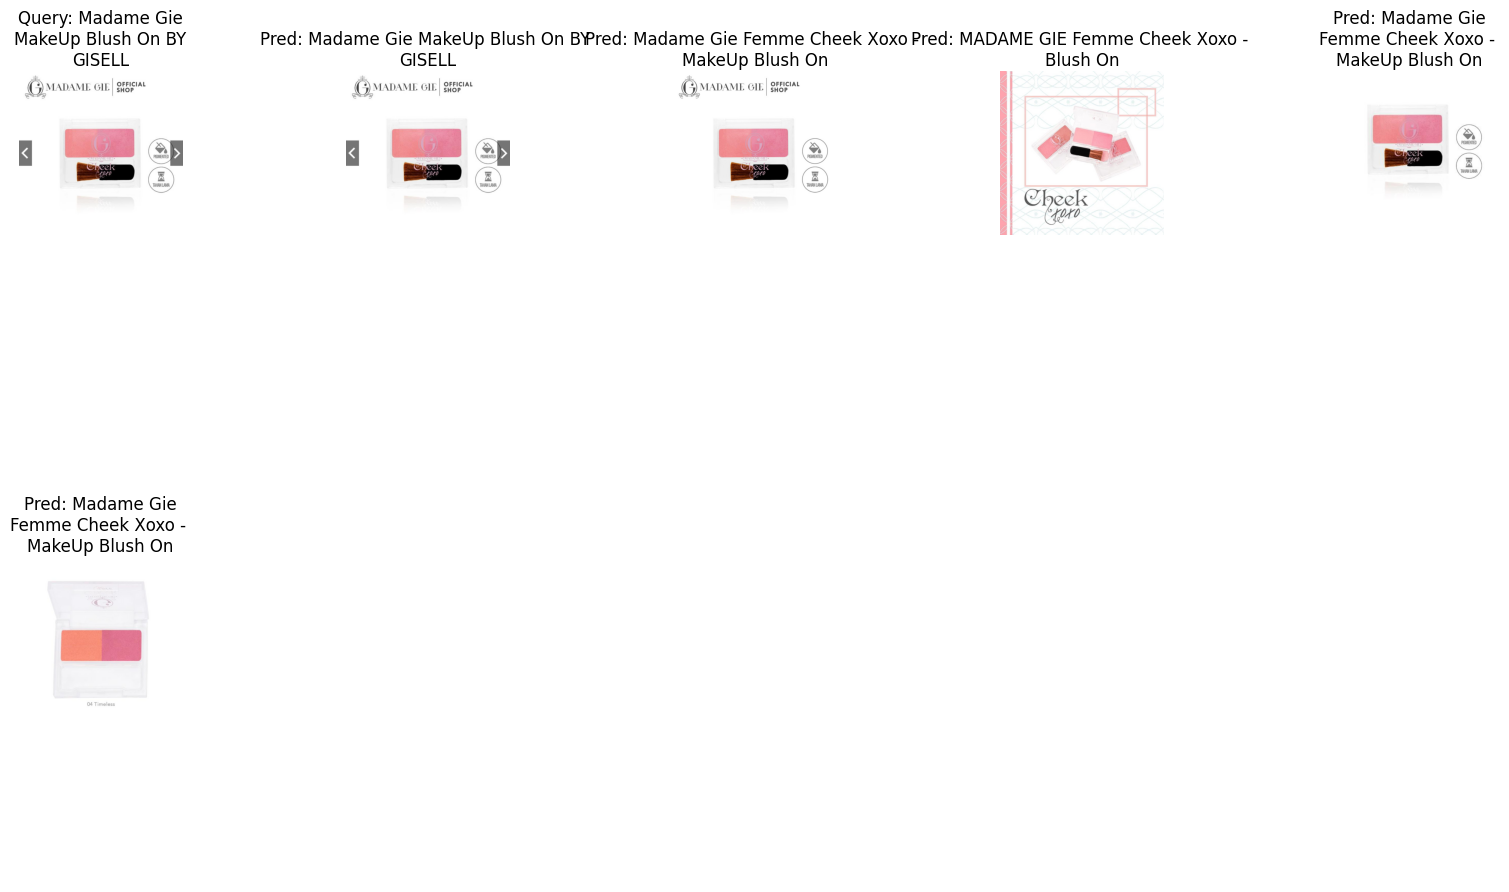

Processed prompts: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it, est. speed input: 1616.75 toks/s, output: 0.68 toks/s]


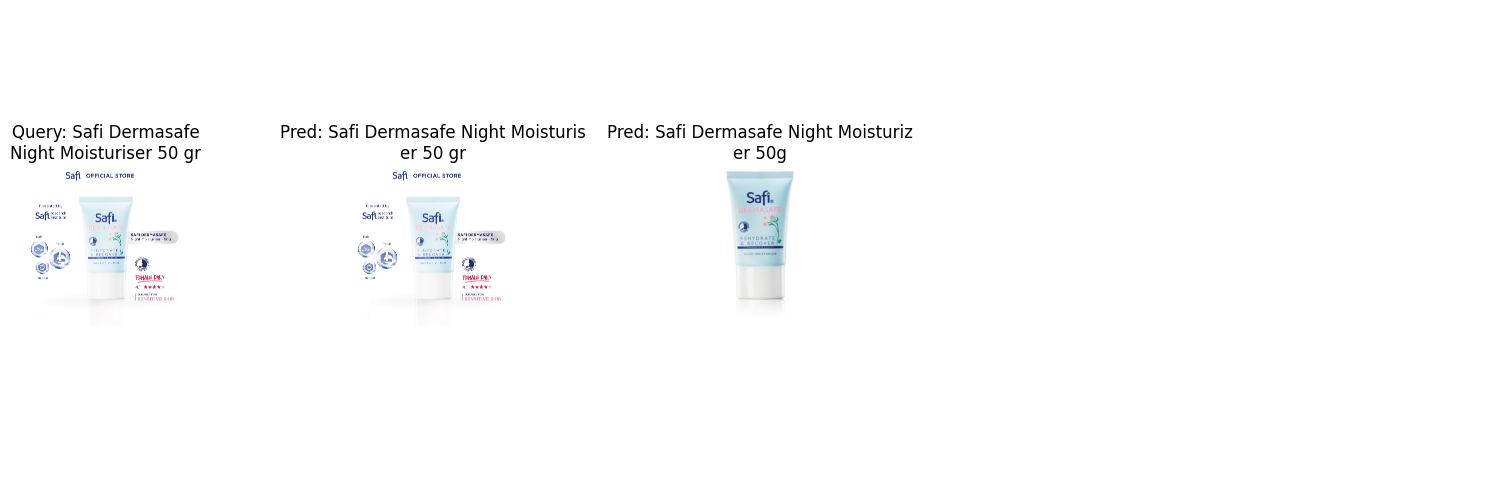

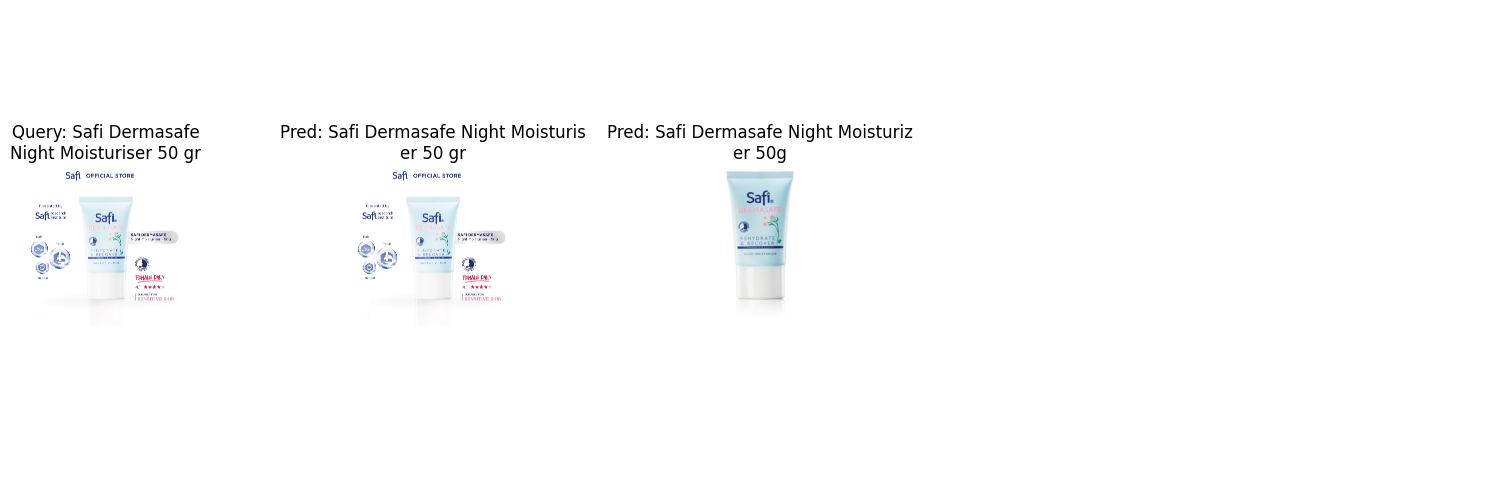

In [5]:
# iterate over the rows of the dataframe
for i, row in df.iterrows():
    query_text = row["title"]
    query_image_path = row["image_path"]
    preds_ids = row["pred"]
    preds_df = df[df["posting_id"].isin(preds_ids)]

    preds_ids = preds_df["posting_id"].tolist()
    preds_text = preds_df["title"].tolist()
    preds_image_path = preds_df["image_path"].tolist()

    reranked_ids = reranker.rerank(
        query_text,
        preds_text,
        query_image_path,
        preds_image_path,
        preds_ids,
        use_tqdm=True,
    )
    gt_ids = row["label"]

    reranked_df = df[df["posting_id"].isin(reranked_ids)]
    reranked_ids = reranked_df["posting_id"].tolist()
    reranked_text = reranked_df["title"].tolist()
    reranked_image_path = reranked_df["image_path"].tolist()
    visualize(query_text, reranked_text, query_image_path, reranked_image_path)

    gt_df = df[df["posting_id"].isin(gt_ids)]
    gt_ids = gt_df["posting_id"].tolist()
    gt_text = gt_df["title"].tolist()
    gt_image_path = gt_df["image_path"].tolist()
    visualize(query_text, gt_text, query_image_path, gt_image_path)
    if i == 20:
        break